### QUESTION 1

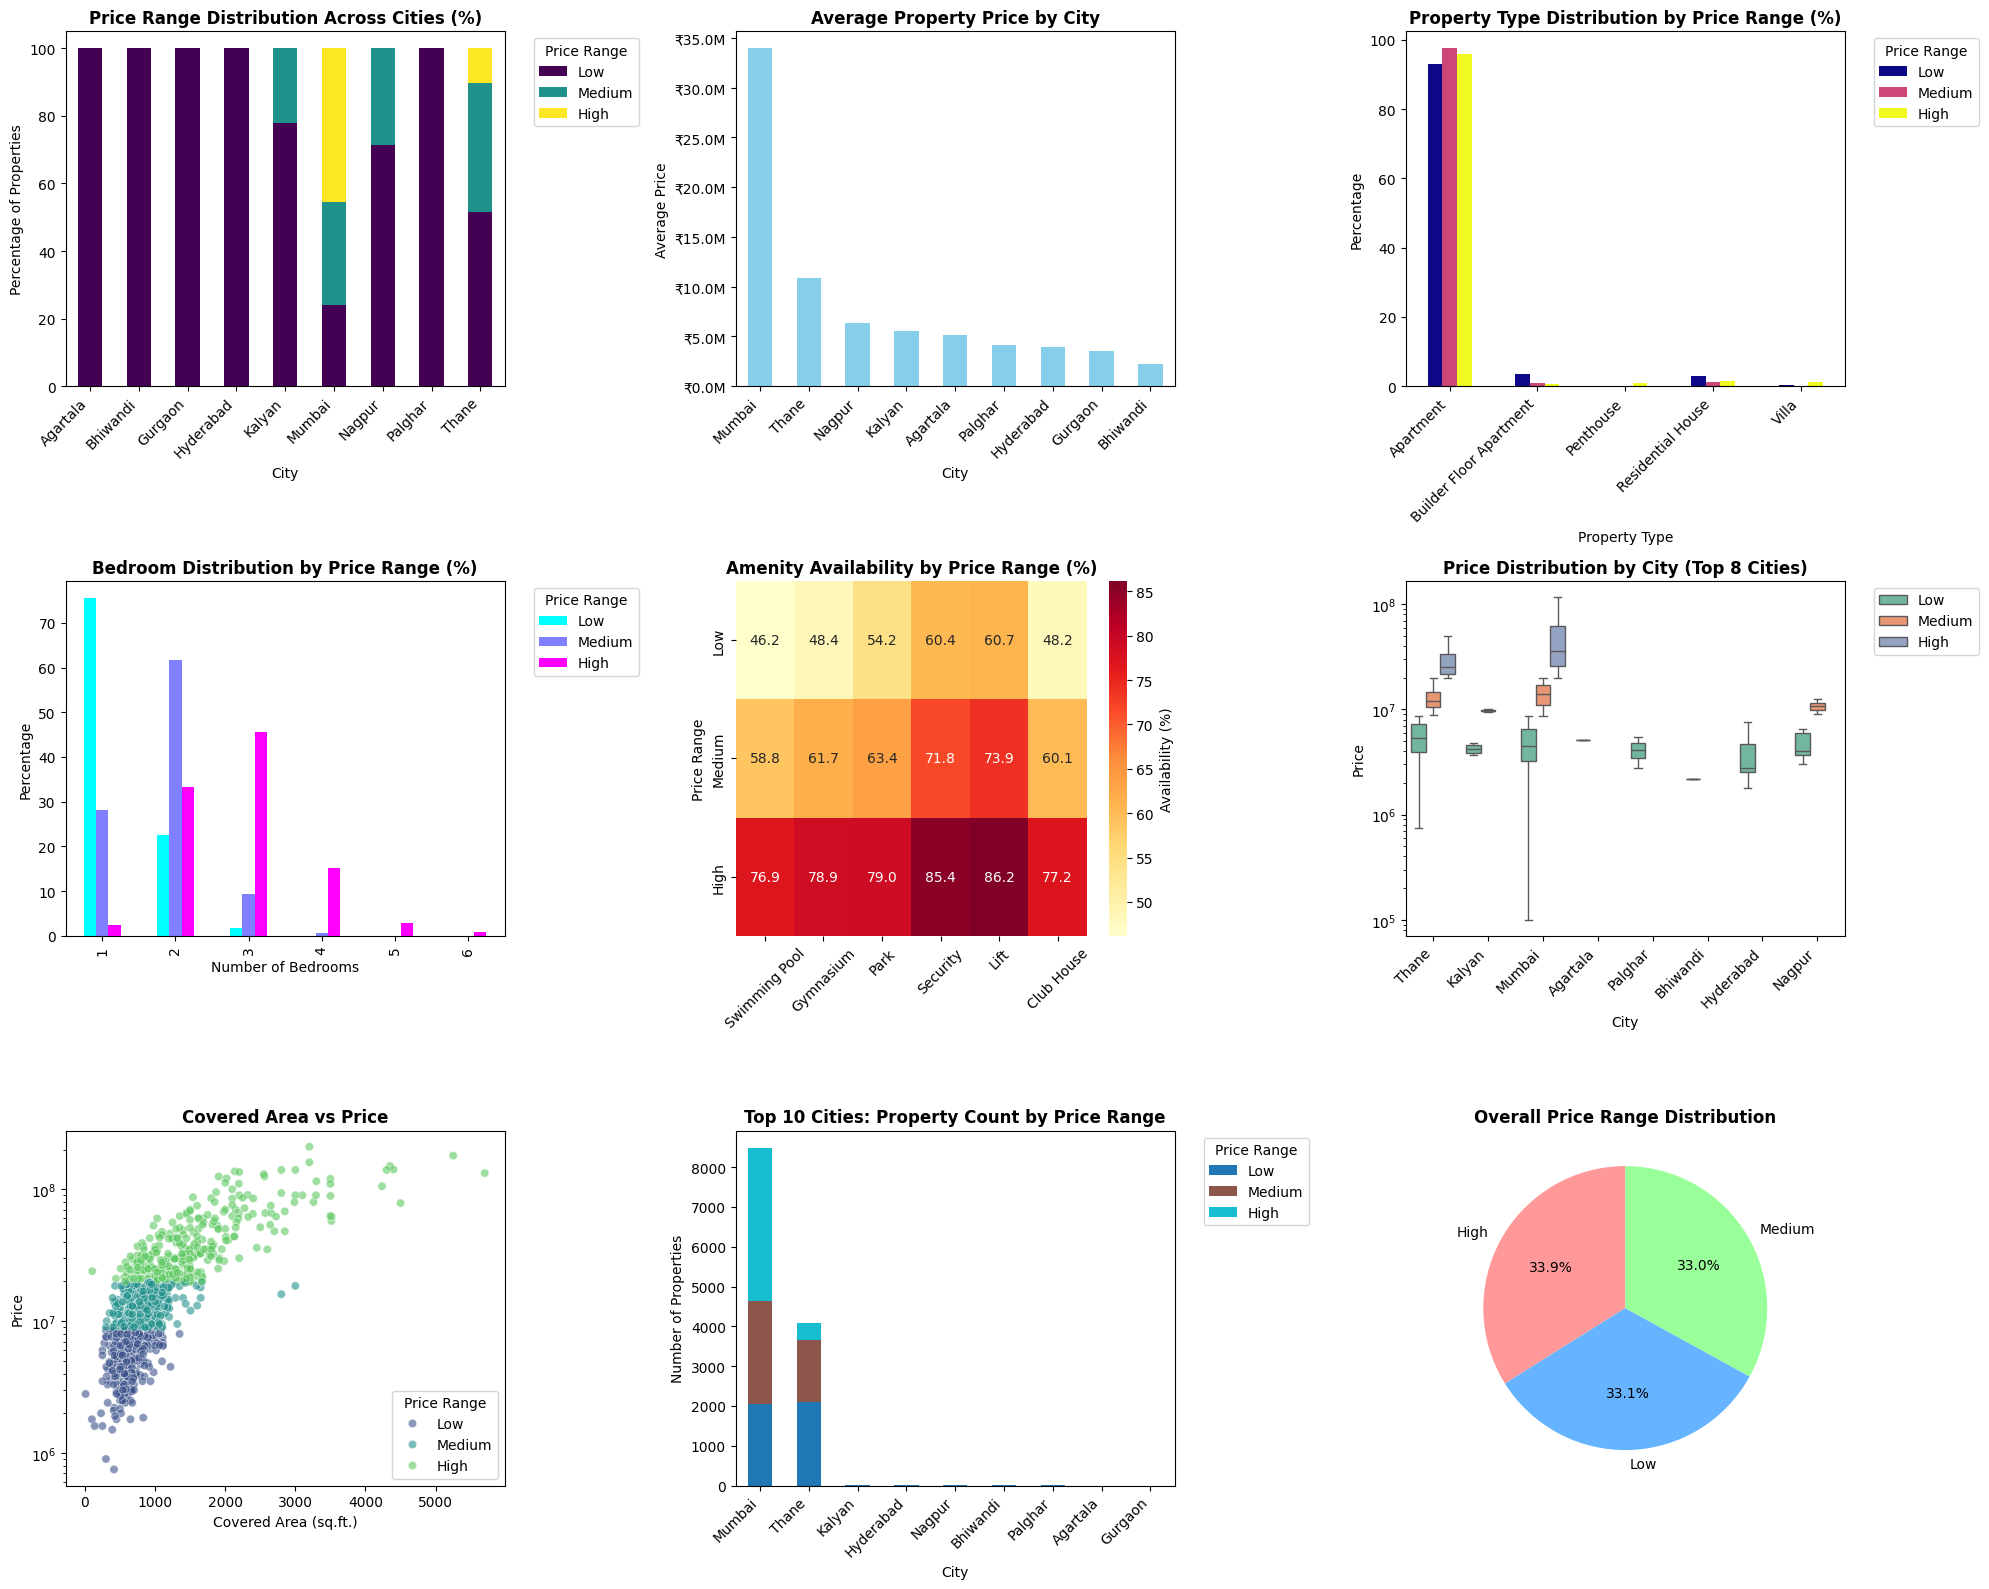

COMPREHENSIVE REAL ESTATE MARKET ANALYSIS

LOW PRICE RANGE MARKET SUMMARY
Basic Statistics:
   • Number of properties: 4,168
   • Average price: ₹5,157,855
   • Price range: ₹100,000 - ₹8,700,000
   • Average covered area: 622 sq.ft.
   • Average bedrooms: 1.3

Geographic Distribution:
   • Thane: 2101 properties (50.4%)
   • Mumbai: 2041 properties (49.0%)
   • Hyderabad: 8 properties (0.2%)
   • Kalyan: 7 properties (0.2%)
   • Nagpur: 5 properties (0.1%)

Property Type Analysis:
   • Apartment: 3881 properties (93.1%)
   • Builder Floor Apartment: 145 properties (3.5%)
   • Residential House: 126 properties (3.0%)

Key Amenities (Availability > 30%):
   • Swimming Pool: 46.2%
   • Gymnasium: 48.4%
   • Park: 54.2%
   • Security: 60.4%
   • Lift: 60.7%
   • Club House: 48.2%

Top Developers:
   • Lodha: 273 properties
   • Runwal Developers: 72 properties
   • Sunteck Realty Ltd.: 53 properties

MEDIUM PRICE RANGE MARKET SUMMARY
Basic Statistics:
   • Number of properties: 4,159
   •

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
df = pd.read_csv('M25_DA_A1_Dataset2.csv')

# Data cleaning and preparation
# Convert price to numeric if it's stored as string
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

# Remove rows with missing prices
df = df.dropna(subset=['Price'])

# Define price ranges (low, medium, high) using percentiles
price_percentiles = df['Price'].quantile([0.33, 0.66]).values
df['Price Range'] = pd.cut(df['Price'], 
                          bins=[0, price_percentiles[0], price_percentiles[1], df['Price'].max()],
                          labels=['Low', 'Medium', 'High'])

# Create a figure with multiple subplots
plt.figure(figsize=(20, 16))

# 1. Distribution of price ranges across cities (stacked bar chart)
plt.subplot(3, 3, 1)
price_city_dist = pd.crosstab(df['City'], df['Price Range'], normalize='index') * 100
price_city_dist.plot(kind='bar', stacked=True, ax=plt.gca(), colormap='viridis')
plt.title('Price Range Distribution Across Cities (%)', fontsize=12, fontweight='bold')
plt.ylabel('Percentage of Properties', fontsize=10)
plt.xlabel('City', fontsize=10)
plt.legend(title='Price Range', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')

# 2. Average price by city
plt.subplot(3, 3, 2)
city_avg_prices = df.groupby('City')['Price'].mean().sort_values(ascending=False)
city_avg_prices.plot(kind='bar', color='skyblue')
plt.title('Average Property Price by City', fontsize=12, fontweight='bold')
plt.ylabel('Average Price', fontsize=10)
plt.xlabel('City', fontsize=10)
plt.xticks(rotation=45, ha='right')
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, p: f'₹{x/1000000:.1f}M'))

# 3. Property type distribution across price ranges
plt.subplot(3, 3, 3)
prop_type_dist = pd.crosstab(df['Type of Property'], df['Price Range'], normalize='columns') * 100
prop_type_dist.plot(kind='bar', ax=plt.gca(), colormap='plasma')
plt.title('Property Type Distribution by Price Range (%)', fontsize=12, fontweight='bold')
plt.ylabel('Percentage', fontsize=10)
plt.xlabel('Property Type', fontsize=10)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Price Range', bbox_to_anchor=(1.05, 1), loc='upper left')

# 4. Number of bedrooms distribution by price range
plt.subplot(3, 3, 4)
bedroom_dist = pd.crosstab(df['bedroom'], df['Price Range'], normalize='columns') * 100
bedroom_dist.plot(kind='bar', ax=plt.gca(), colormap='cool')
plt.title('Bedroom Distribution by Price Range (%)', fontsize=12, fontweight='bold')
plt.ylabel('Percentage', fontsize=10)
plt.xlabel('Number of Bedrooms', fontsize=10)
plt.legend(title='Price Range', bbox_to_anchor=(1.05, 1), loc='upper left')

# 5. Amenities heatmap by price range
plt.subplot(3, 3, 5)
amenities_columns = ['Swimming Pool', 'Gymnasium', 'Park', 'Security', 'Lift', 'Club House']
# Filter amenities that exist in the dataset
available_amenities = [col for col in amenities_columns if col in df.columns]

if available_amenities:
    amenity_rates = df.groupby('Price Range')[available_amenities].mean() * 100
    sns.heatmap(amenity_rates, annot=True, fmt='.1f', cmap='YlOrRd', 
                cbar_kws={'label': 'Availability (%)'})
    plt.title('Amenity Availability by Price Range (%)', fontsize=12, fontweight='bold')
    plt.xticks(rotation=45)
else:
    plt.text(0.5, 0.5, 'Amenity data not available', ha='center', va='center')
    plt.title('Amenity Data Not Available', fontsize=12, fontweight='bold')

# 6. Price distribution by city (boxplot)
plt.subplot(3, 3, 6)
city_data = df[df['City'].isin(df['City'].value_counts().head(8).index)]  # Top 8 cities
sns.boxplot(data=city_data, x='City', y='Price', hue='Price Range', 
            palette='Set2', showfliers=False)
plt.title('Price Distribution by City (Top 8 Cities)', fontsize=12, fontweight='bold')
plt.ylabel('Price', fontsize=10)
plt.xlabel('City', fontsize=10)
plt.xticks(rotation=45, ha='right')
plt.yscale('log')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# 7. Covered Area vs Price scatter plot
plt.subplot(3, 3, 7)
if 'Covered Area' in df.columns:
    sample_data = df.sample(min(1000, len(df)))  # Sample for better visualization
    sns.scatterplot(data=sample_data, x='Covered Area', y='Price', hue='Price Range', 
                   palette='viridis', alpha=0.6)
    plt.title('Covered Area vs Price', fontsize=12, fontweight='bold')
    plt.xlabel('Covered Area (sq.ft.)', fontsize=10)
    plt.ylabel('Price', fontsize=10)
    plt.yscale('log')
else:
    plt.text(0.5, 0.5, 'Covered Area data not available', ha='center', va='center')
    plt.title('Covered Area Data Not Available', fontsize=12, fontweight='bold')

# 8. City-wise property count by price range
plt.subplot(3, 3, 8)
city_price_count = df.groupby(['City', 'Price Range']).size().unstack().fillna(0)
city_price_count['Total'] = city_price_count.sum(axis=1)
top_cities = city_price_count.nlargest(10, 'Total').drop('Total', axis=1)
top_cities.plot(kind='bar', stacked=True, colormap='tab10', ax=plt.gca())
plt.title('Top 10 Cities: Property Count by Price Range', fontsize=12, fontweight='bold')
plt.ylabel('Number of Properties', fontsize=10)
plt.xlabel('City', fontsize=10)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Price Range', bbox_to_anchor=(1.05, 1), loc='upper left')

# 9. Price range distribution pie chart
plt.subplot(3, 3, 9)
price_range_counts = df['Price Range'].value_counts()
colors = ['#ff9999', '#66b3ff', '#99ff99']
plt.pie(price_range_counts.values, labels=price_range_counts.index, autopct='%1.1f%%',
        colors=colors, startangle=90)
plt.title('Overall Price Range Distribution', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

# Generate comprehensive market summary
print("=" * 80)
print("COMPREHENSIVE REAL ESTATE MARKET ANALYSIS")
print("=" * 80)

for price_range in ['Low', 'Medium', 'High']:
    subset = df[df['Price Range'] == price_range]
    
    print(f"\n{'='*40}")
    print(f"{price_range.upper()} PRICE RANGE MARKET SUMMARY")
    print(f"{'='*40}")
    
    # Basic statistics
    print(f"Basic Statistics:")
    print(f"   • Number of properties: {len(subset):,}")
    print(f"   • Average price: ₹{subset['Price'].mean():,.0f}")
    print(f"   • Price range: ₹{subset['Price'].min():,.0f} - ₹{subset['Price'].max():,.0f}")
    
    if 'Covered Area' in df.columns:
        print(f"   • Average covered area: {subset['Covered Area'].mean():.0f} sq.ft.")
    
    if 'bedroom' in df.columns:
        print(f"   • Average bedrooms: {subset['bedroom'].mean():.1f}")
    
    # Top cities
    print(f"\nGeographic Distribution:")
    top_cities = subset['City'].value_counts().head(5)
    for city, count in top_cities.items():
        percentage = (count / len(subset)) * 100
        print(f"   • {city}: {count} properties ({percentage:.1f}%)")
    
    # Property type analysis
    print(f"\nProperty Type Analysis:")
    prop_types = subset['Type of Property'].value_counts().head(3)
    for prop_type, count in prop_types.items():
        percentage = (count / len(subset)) * 100
        print(f"   • {prop_type}: {count} properties ({percentage:.1f}%)")
    
    # Amenities analysis
    print(f"\nKey Amenities (Availability > 30%):")
    amenities_to_check = ['Swimming Pool', 'Gymnasium', 'Park', 'Security', 'Lift', 'Club House']
    for amenity in amenities_to_check:
        if amenity in df.columns:
            availability = subset[amenity].mean() * 100
            if availability > 30:
                print(f"   • {amenity}: {availability:.1f}%")
    
    # Developer analysis if available
    if 'Developer' in df.columns:
        print(f"\nTop Developers:")
        top_developers = subset['Developer'].value_counts().head(3)
        for developer, count in top_developers.items():
            print(f"   • {developer}: {count} properties")

# Additional market insights
print(f"\n{'='*80}")
print("OVERALL MARKET INSIGHTS")
print(f"{'='*80}")

# City analysis
city_stats = df.groupby('City').agg({
    'Price': ['count', 'mean', 'median'],
    'bedroom': 'mean' if 'bedroom' in df.columns else 'count'
}).round(0)

city_stats.columns = ['Property_Count', 'Avg_Price', 'Median_Price', 'Avg_Bedrooms']
city_stats = city_stats.sort_values('Avg_Price', ascending=False)

print(f"\nPremium Markets (Highest Average Prices):")
for city in city_stats.head(3).index:
    price = city_stats.loc[city, 'Avg_Price']
    print(f"   • {city}: ₹{price:,.0f}")

print(f"\nMost Affordable Markets:")
for city in city_stats.tail(3).index:
    price = city_stats.loc[city, 'Avg_Price']
    print(f"   • {city}: ₹{price:,.0f}")

print(f"\nMarket Concentration:")
total_properties = len(df)
for price_range in ['Low', 'Medium', 'High']:
    count = len(df[df['Price Range'] == price_range])
    percentage = (count / total_properties) * 100
    print(f"   • {price_range} range: {count} properties ({percentage:.1f}%)")

# Save the analysis to CSV for further use
df.to_csv('real_estate_analysis_with_price_ranges.csv', index=False)
# print(f"\nAnalysis complete! Data saved to 'real_estate_analysis_with_price_ranges.csv'")

### QUESTION 2

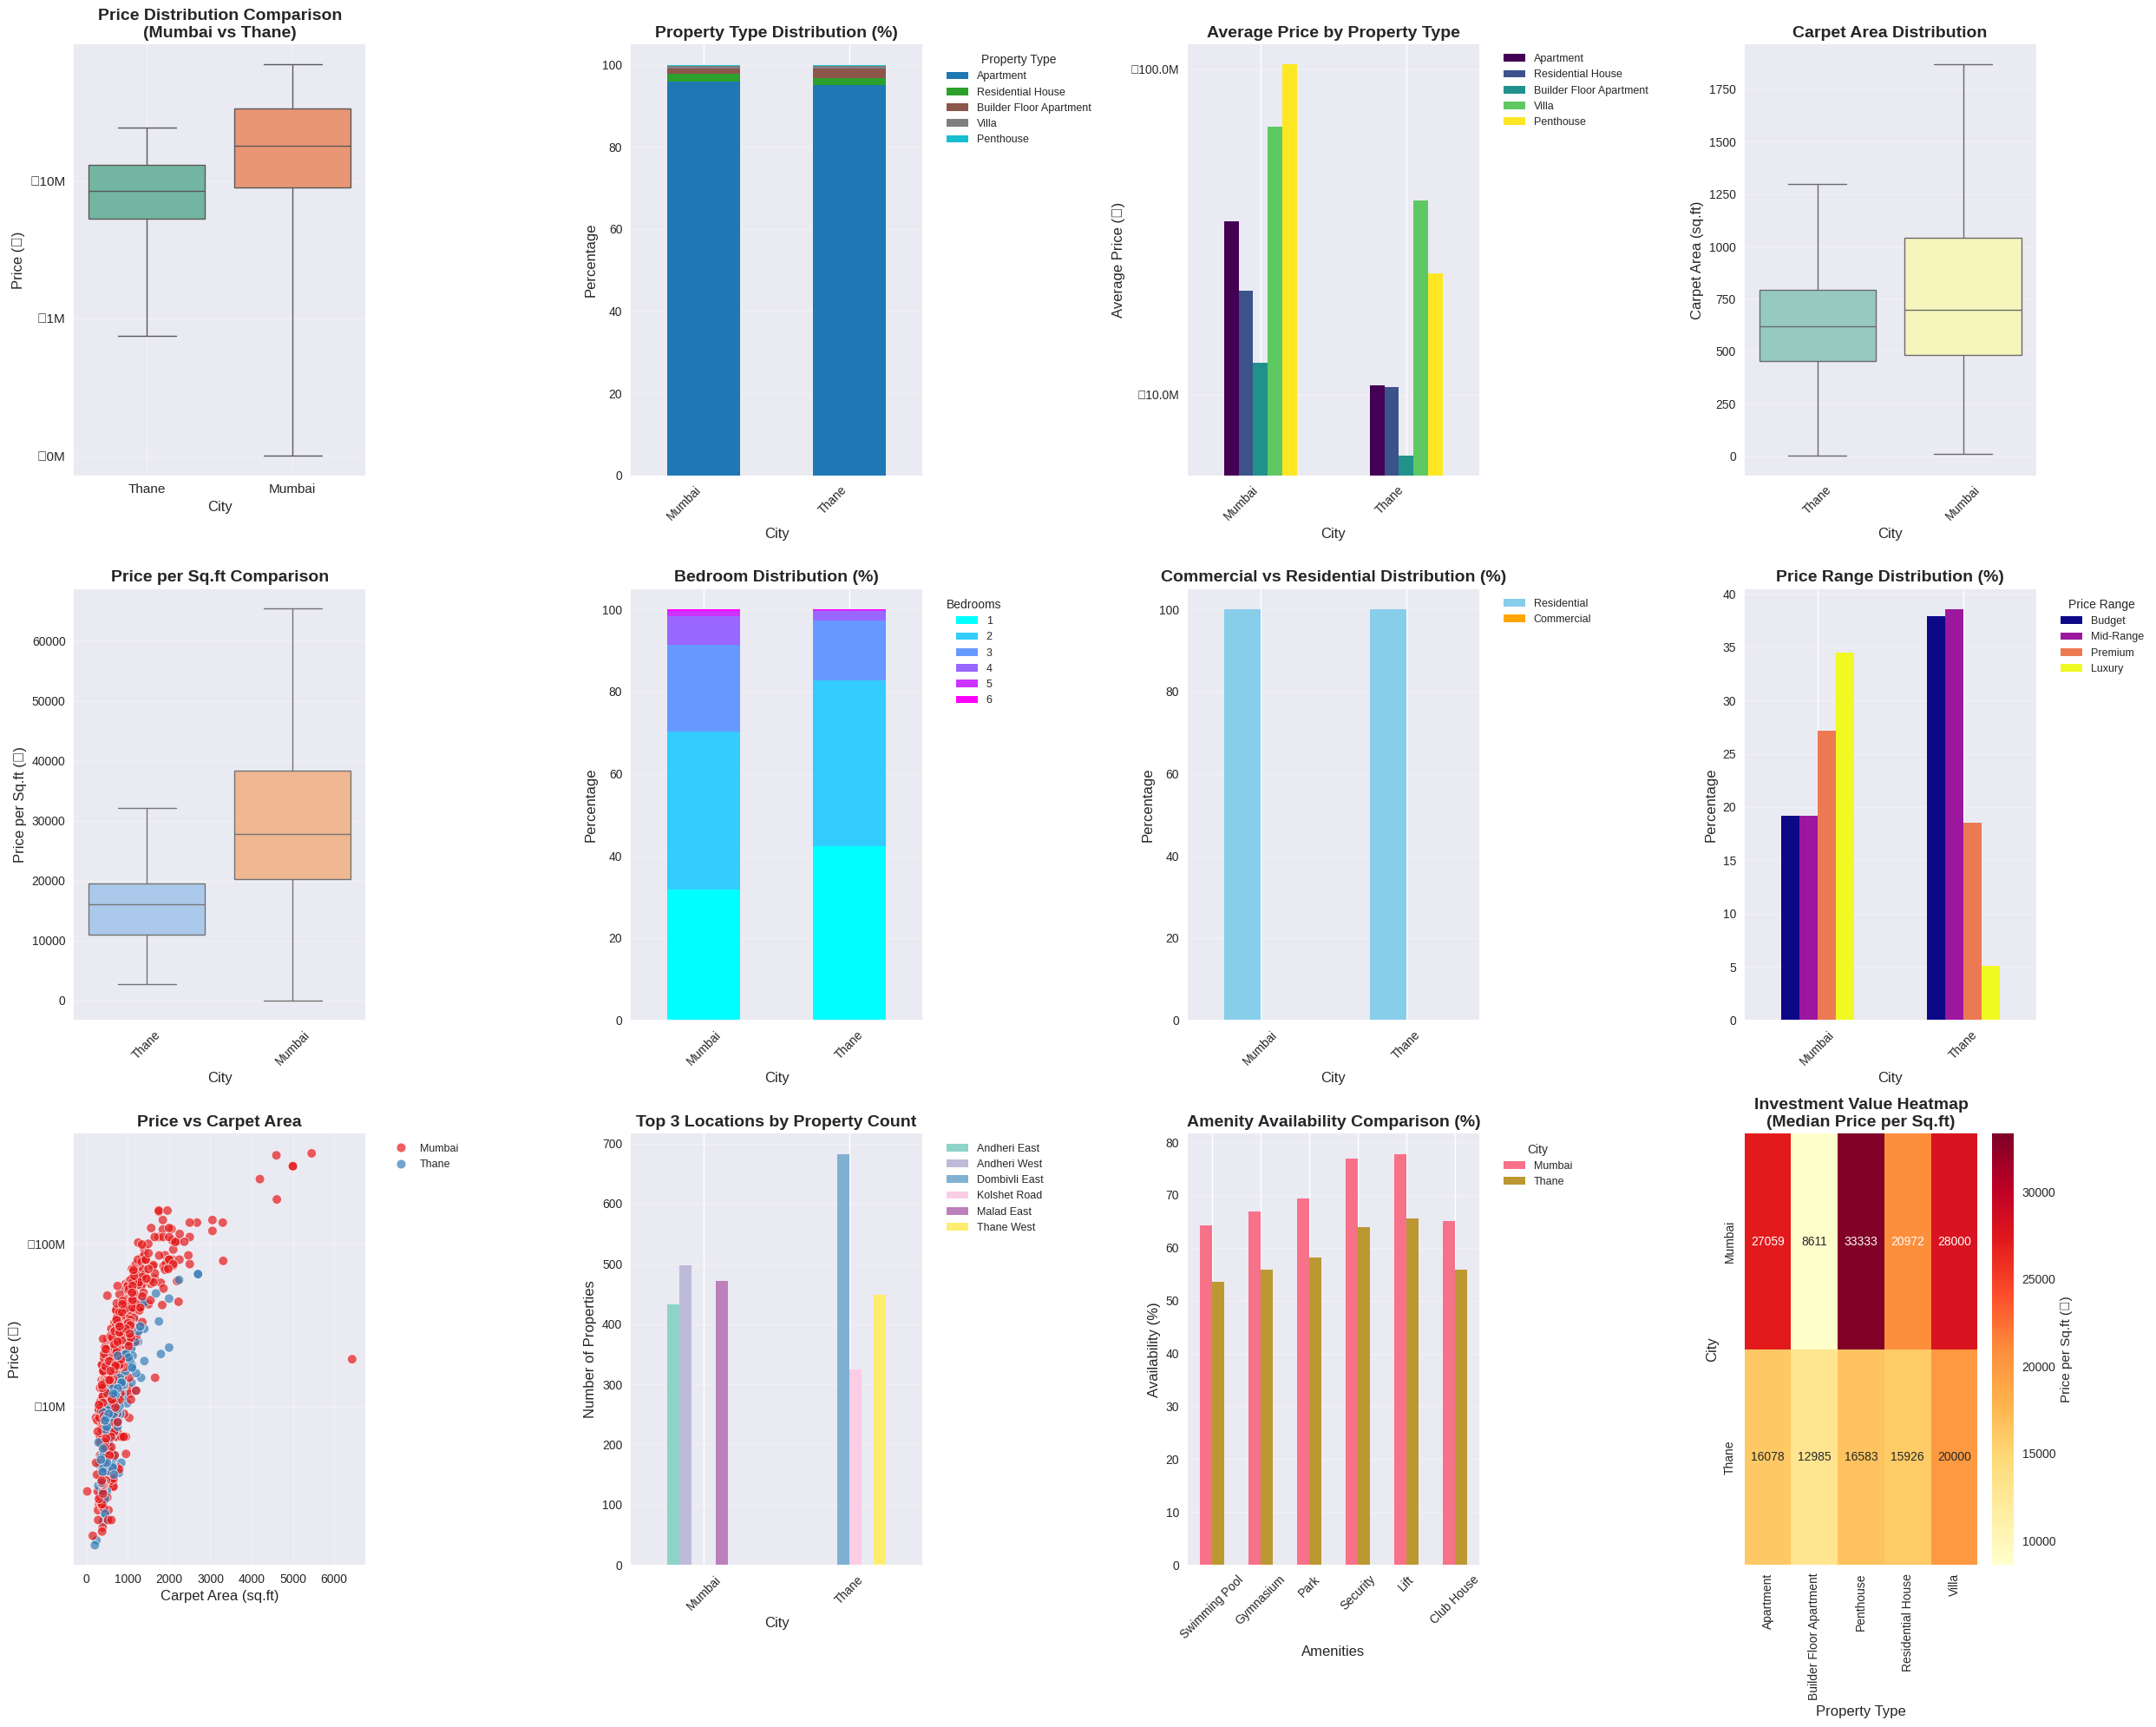

MUMBAI vs THANE: COMPREHENSIVE INVESTMENT ANALYSIS

MUMBAI - INVESTMENT PROFILE
Basic Statistics:
   • Total properties: 8,495
   • Average price: ₹33,950,500
   • Median price: ₹18,000,000
   • Average carpet area: 876 sq.ft
   • Average price per sq.ft: ₹42272

Property Type Distribution:
   • Apartment: 8138 properties (95.8%)
   • Residential House: 169 properties (2.0%)
   • Builder Floor Apartment: 111 properties (1.3%)
   • Villa: 51 properties (0.6%)
   • Penthouse: 26 properties (0.3%)

Commercial vs Residential:
   • Residential: 8495 (100.0%)
   • Commercial: 0 (0.0%)

THANE - INVESTMENT PROFILE
Basic Statistics:
   • Total properties: 4,076
   • Average price: ₹10,829,803
   • Median price: ₹8,500,000
   • Average carpet area: 685 sq.ft
   • Average price per sq.ft: ₹16926

Property Type Distribution:
   • Apartment: 3876 properties (95.1%)
   • Builder Floor Apartment: 94 properties (2.3%)
   • Residential House: 67 properties (1.6%)
   • Villa: 27 properties (0.7%)
   • P

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter
import warnings
warnings.filterwarnings('ignore')

# Set the style for better looking plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Load the dataset
df = pd.read_csv('M25_DA_A1_Dataset2.csv')

# Data cleaning and preparation
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')
df = df.dropna(subset=['Price', 'City'])

# Filter for Mumbai and Thane
cities_to_analyze = ['Mumbai', 'Thane']
df_cities = df[df['City'].isin(cities_to_analyze)].copy()

# Convert carpet area to numeric if available
if 'Carpet Area' in df_cities.columns:
    df_cities['Carpet Area'] = pd.to_numeric(df_cities['Carpet Area'], errors='coerce')

# Clean Commercial column - handle both numeric and string values
if 'Commercial' in df_cities.columns:
    # Convert to numeric, handling errors
    df_cities['Commercial'] = pd.to_numeric(df_cities['Commercial'], errors='coerce')
    # Fill NaN values with 0 (assuming residential if not specified)
    df_cities['Commercial'] = df_cities['Commercial'].fillna(0)
    # Convert to binary (0 = Residential, 1 = Commercial)
    df_cities['Commercial'] = df_cities['Commercial'].apply(lambda x: 1 if x > 0 else 0)
else:
    # Create Commercial column based on property type if not available
    df_cities['Commercial'] = df_cities['Type of Property'].apply(
        lambda x: 1 if isinstance(x, str) and any(word in x.lower() for word in ['commercial', 'office', 'shop', 'retail', 'business']) else 0
    )

# Create subplots
fig = plt.figure(figsize=(25, 20))

# 1. Price Distribution Comparison
plt.subplot(3, 4, 1)
sns.boxplot(data=df_cities, x='City', y='Price', showfliers=False, palette='Set2')
plt.title('Price Distribution Comparison\n(Mumbai vs Thane)', fontsize=14, fontweight='bold')
plt.ylabel('Price (₹)', fontsize=12)
plt.xlabel('City', fontsize=12)
plt.yscale('log')
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, p: f'₹{x/1000000:.0f}M'))
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.grid(True, alpha=0.3)

# 2. Property Type Distribution
plt.subplot(3, 4, 2)
if 'Type of Property' in df_cities.columns:
    prop_type_dist = pd.crosstab(df_cities['City'], df_cities['Type of Property'], normalize='index') * 100
    # Get top 5 property types for better visualization
    top_properties = prop_type_dist.sum().nlargest(5).index
    prop_type_dist = prop_type_dist[top_properties]
    prop_type_dist.plot(kind='bar', stacked=True, ax=plt.gca(), colormap='tab10')
    plt.title('Property Type Distribution (%)', fontsize=14, fontweight='bold')
    plt.ylabel('Percentage', fontsize=12)
    plt.xlabel('City', fontsize=12)
    plt.legend(title='Property Type', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=9)
    plt.xticks(rotation=45, ha='right')
    plt.grid(True, alpha=0.3, axis='y')
else:
    plt.text(0.5, 0.5, 'Property Type data not available', ha='center', va='center', fontsize=12)
    plt.title('Property Type Data Not Available', fontsize=14, fontweight='bold')

# 3. Average Price by Property Type
plt.subplot(3, 4, 3)
if 'Type of Property' in df_cities.columns:
    avg_price_type = df_cities.groupby(['City', 'Type of Property'])['Price'].mean().unstack()
    # Get top 5 property types by count for better visualization
    top_properties = df_cities['Type of Property'].value_counts().head(5).index
    avg_price_type = avg_price_type[top_properties]
    avg_price_type.plot(kind='bar', ax=plt.gca(), colormap='viridis')
    plt.title('Average Price by Property Type', fontsize=14, fontweight='bold')
    plt.ylabel('Average Price (₹)', fontsize=12)
    plt.xlabel('City', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.yscale('log')
    plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, p: f'₹{x/1000000:.1f}M'))
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=9)
    plt.grid(True, alpha=0.3, axis='y')
else:
    plt.text(0.5, 0.5, 'Property Type data not available', ha='center', va='center', fontsize=12)
    plt.title('Property Type Data Not Available', fontsize=14, fontweight='bold')

# 4. Carpet Area Distribution
plt.subplot(3, 4, 4)
if 'Carpet Area' in df_cities.columns:
    carpet_data = df_cities.dropna(subset=['Carpet Area'])
    if len(carpet_data) > 0:
        sns.boxplot(data=carpet_data, x='City', y='Carpet Area', showfliers=False, palette='Set3')
        plt.title('Carpet Area Distribution', fontsize=14, fontweight='bold')
        plt.ylabel('Carpet Area (sq.ft)', fontsize=12)
        plt.xlabel('City', fontsize=12)
        plt.xticks(rotation=45)
        plt.grid(True, alpha=0.3, axis='y')
    else:
        plt.text(0.5, 0.5, 'No valid Carpet Area data', ha='center', va='center', fontsize=12)
        plt.title('Carpet Area Data Not Available', fontsize=14, fontweight='bold')
else:
    plt.text(0.5, 0.5, 'Carpet Area data not available', ha='center', va='center', fontsize=12)
    plt.title('Carpet Area Data Not Available', fontsize=14, fontweight='bold')

# 5. Price per Sq.ft Comparison
plt.subplot(3, 4, 5)
if 'Carpet Area' in df_cities.columns:
    carpet_data = df_cities.dropna(subset=['Carpet Area'])
    if len(carpet_data) > 0:
        carpet_data['Price_per_sqft'] = carpet_data['Price'] / carpet_data['Carpet Area']
        # Remove extreme outliers for better visualization
        carpet_data = carpet_data[carpet_data['Price_per_sqft'] < carpet_data['Price_per_sqft'].quantile(0.99)]
        sns.boxplot(data=carpet_data, x='City', y='Price_per_sqft', showfliers=False, palette='pastel')
        plt.title('Price per Sq.ft Comparison', fontsize=14, fontweight='bold')
        plt.ylabel('Price per Sq.ft (₹)', fontsize=12)
        plt.xlabel('City', fontsize=12)
        plt.xticks(rotation=45)
        plt.grid(True, alpha=0.3, axis='y')
    else:
        plt.text(0.5, 0.5, 'No valid data for calculation', ha='center', va='center', fontsize=12)
        plt.title('Price per Sq.ft Not Available', fontsize=14, fontweight='bold')
else:
    plt.text(0.5, 0.5, 'Carpet Area data not available', ha='center', va='center', fontsize=12)
    plt.title('Price per Sq.ft Not Available', fontsize=14, fontweight='bold')

# 6. Bedroom Distribution
plt.subplot(3, 4, 6)
if 'bedroom' in df_cities.columns:
    bedroom_dist = pd.crosstab(df_cities['City'], df_cities['bedroom'], normalize='index') * 100
    bedroom_dist.plot(kind='bar', stacked=True, ax=plt.gca(), colormap='cool')
    plt.title('Bedroom Distribution (%)', fontsize=14, fontweight='bold')
    plt.ylabel('Percentage', fontsize=12)
    plt.xlabel('City', fontsize=12)
    plt.legend(title='Bedrooms', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=9)
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3, axis='y')
else:
    plt.text(0.5, 0.5, 'Bedroom data not available', ha='center', va='center', fontsize=12)
    plt.title('Bedroom Data Not Available', fontsize=14, fontweight='bold')

# 7. Commercial vs Residential Analysis - FIXED VERSION
plt.subplot(3, 4, 7)
commercial_dist = pd.crosstab(df_cities['City'], df_cities['Commercial'], normalize='index') * 100

# Handle case where there might be only one category
if len(commercial_dist.columns) == 1:
    # If only one category exists, create the missing category with zeros
    missing_category = 1 if 0 in commercial_dist.columns else 0
    commercial_dist[missing_category] = 0
    commercial_dist = commercial_dist[[0, 1]]  # Ensure correct order

commercial_dist.columns = ['Residential', 'Commercial']
commercial_dist.plot(kind='bar', ax=plt.gca(), color=['skyblue', 'orange'])
plt.title('Commercial vs Residential Distribution (%)', fontsize=14, fontweight='bold')
plt.ylabel('Percentage', fontsize=12)
plt.xlabel('City', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=9)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3, axis='y')

# 8. Price Range Distribution
plt.subplot(3, 4, 8)
price_ranges = pd.qcut(df_cities['Price'], q=4, labels=['Budget', 'Mid-Range', 'Premium', 'Luxury'])
price_range_dist = pd.crosstab(df_cities['City'], price_ranges, normalize='index') * 100
price_range_dist.plot(kind='bar', ax=plt.gca(), colormap='plasma')
plt.title('Price Range Distribution (%)', fontsize=14, fontweight='bold')
plt.ylabel('Percentage', fontsize=12)
plt.xlabel('City', fontsize=12)
plt.legend(title='Price Range', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=9)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3, axis='y')

# 9. Scatter Plot: Price vs Carpet Area
plt.subplot(3, 4, 9)
if 'Carpet Area' in df_cities.columns:
    scatter_data = df_cities.dropna(subset=['Carpet Area']).sample(min(1000, len(df_cities)), random_state=42)
    sns.scatterplot(data=scatter_data, x='Carpet Area', y='Price', hue='City', alpha=0.7, palette='Set1', s=60)
    plt.title('Price vs Carpet Area', fontsize=14, fontweight='bold')
    plt.xlabel('Carpet Area (sq.ft)', fontsize=12)
    plt.ylabel('Price (₹)', fontsize=12)
    plt.yscale('log')
    plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, p: f'₹{x/1000000:.0f}M'))
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=9)
    plt.grid(True, alpha=0.3)
else:
    plt.text(0.5, 0.5, 'Carpet Area data not available', ha='center', va='center', fontsize=12)
    plt.title('Carpet Area Data Not Available', fontsize=14, fontweight='bold')

# 10. Top Locations within each city
plt.subplot(3, 4, 10)
if 'Area Name' in df_cities.columns:
    top_locations = df_cities.groupby(['City', 'Area Name']).size()
    top_locations = top_locations.groupby('City').nlargest(3).reset_index(level=0, drop=True).unstack()
    top_locations.plot(kind='bar', ax=plt.gca(), colormap='Set3')
    plt.title('Top 3 Locations by Property Count', fontsize=14, fontweight='bold')
    plt.ylabel('Number of Properties', fontsize=12)
    plt.xlabel('City', fontsize=12)
    plt.xticks(rotation=45)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=9)
    plt.grid(True, alpha=0.3, axis='y')
else:
    plt.text(0.5, 0.5, 'Area Name data not available', ha='center', va='center', fontsize=12)
    plt.title('Location Data Not Available', fontsize=14, fontweight='bold')

# 11. Amenities Comparison
plt.subplot(3, 4, 11)
amenities = ['Swimming Pool', 'Gymnasium', 'Park', 'Security', 'Lift', 'Club House']
available_amenities = [a for a in amenities if a in df_cities.columns]

if available_amenities:
    amenity_rates = df_cities.groupby('City')[available_amenities].mean() * 100
    amenity_rates.T.plot(kind='bar', ax=plt.gca())
    plt.title('Amenity Availability Comparison (%)', fontsize=14, fontweight='bold')
    plt.ylabel('Availability (%)', fontsize=12)
    plt.xlabel('Amenities', fontsize=12)
    plt.legend(title='City', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=9)
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3, axis='y')
else:
    plt.text(0.5, 0.5, 'Amenity data not available', ha='center', va='center', fontsize=12)
    plt.title('Amenity Data Not Available', fontsize=14, fontweight='bold')

# 12. Investment Value Heatmap
plt.subplot(3, 4, 12)
if 'Carpet Area' in df_cities.columns and 'Type of Property' in df_cities.columns:
    investment_data = df_cities.dropna(subset=['Carpet Area'])
    if len(investment_data) > 0:
        investment_data['Price_Area_Ratio'] = investment_data['Price'] / investment_data['Carpet Area']
        # Remove outliers for better heatmap
        investment_data = investment_data[investment_data['Price_Area_Ratio'] < investment_data['Price_Area_Ratio'].quantile(0.95)]
        investment_heatmap = investment_data.groupby(['City', 'Type of Property'])['Price_Area_Ratio'].median().unstack()
        # Get top property types
        top_properties = investment_heatmap.count().nlargest(5).index
        investment_heatmap = investment_heatmap[top_properties]
        sns.heatmap(investment_heatmap, annot=True, fmt='.0f', cmap='YlOrRd', 
                    cbar_kws={'label': 'Price per Sq.ft (₹)'})
        plt.title('Investment Value Heatmap\n(Median Price per Sq.ft)', fontsize=14, fontweight='bold')
        plt.xlabel('Property Type', fontsize=12)
        plt.ylabel('City', fontsize=12)
    else:
        plt.text(0.5, 0.5, 'No valid data for heatmap', ha='center', va='center', fontsize=12)
        plt.title('Investment Analysis Not Available', fontsize=14, fontweight='bold')
else:
    plt.text(0.5, 0.5, 'Required data not available', ha='center', va='center', fontsize=12)
    plt.title('Investment Analysis Not Available', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('mumbai_thane_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

# Generate detailed investment analysis report
print("=" * 80)
print("MUMBAI vs THANE: COMPREHENSIVE INVESTMENT ANALYSIS")
print("=" * 80)

for city in ['Mumbai', 'Thane']:
    city_data = df_cities[df_cities['City'] == city]
    
    print(f"\n{'='*40}")
    print(f"{city.upper()} - INVESTMENT PROFILE")
    print(f"{'='*40}")
    
    print(f"Basic Statistics:")
    print(f"   • Total properties: {len(city_data):,}")
    print(f"   • Average price: ₹{city_data['Price'].mean():,.0f}")
    print(f"   • Median price: ₹{city_data['Price'].median():,.0f}")
    
    if 'Carpet Area' in city_data.columns:
        carpet_data = city_data.dropna(subset=['Carpet Area'])
        if len(carpet_data) > 0:
            print(f"   • Average carpet area: {carpet_data['Carpet Area'].mean():.0f} sq.ft")
            price_per_sqft = carpet_data['Price'].mean() / carpet_data['Carpet Area'].mean()
            print(f"   • Average price per sq.ft: ₹{price_per_sqft:.0f}")
    
    # Property type analysis
    print(f"\nProperty Type Distribution:")
    if 'Type of Property' in city_data.columns:
        prop_types = city_data['Type of Property'].value_counts().head(5)
        for prop_type, count in prop_types.items():
            percentage = (count / len(city_data)) * 100
            print(f"   • {prop_type}: {count} properties ({percentage:.1f}%)")
    
    # Commercial vs Residential
    print(f"\nCommercial vs Residential:")
    commercial_count = city_data['Commercial'].sum()
    residential_count = len(city_data) - commercial_count
    print(f"   • Residential: {residential_count} ({residential_count/len(city_data)*100:.1f}%)")
    print(f"   • Commercial: {commercial_count} ({commercial_count/len(city_data)*100:.1f}%)")

# print(f"\n✅ Analysis complete! Visualizations saved as 'mumbai_thane_comparison.png'")

### QUESTION 3

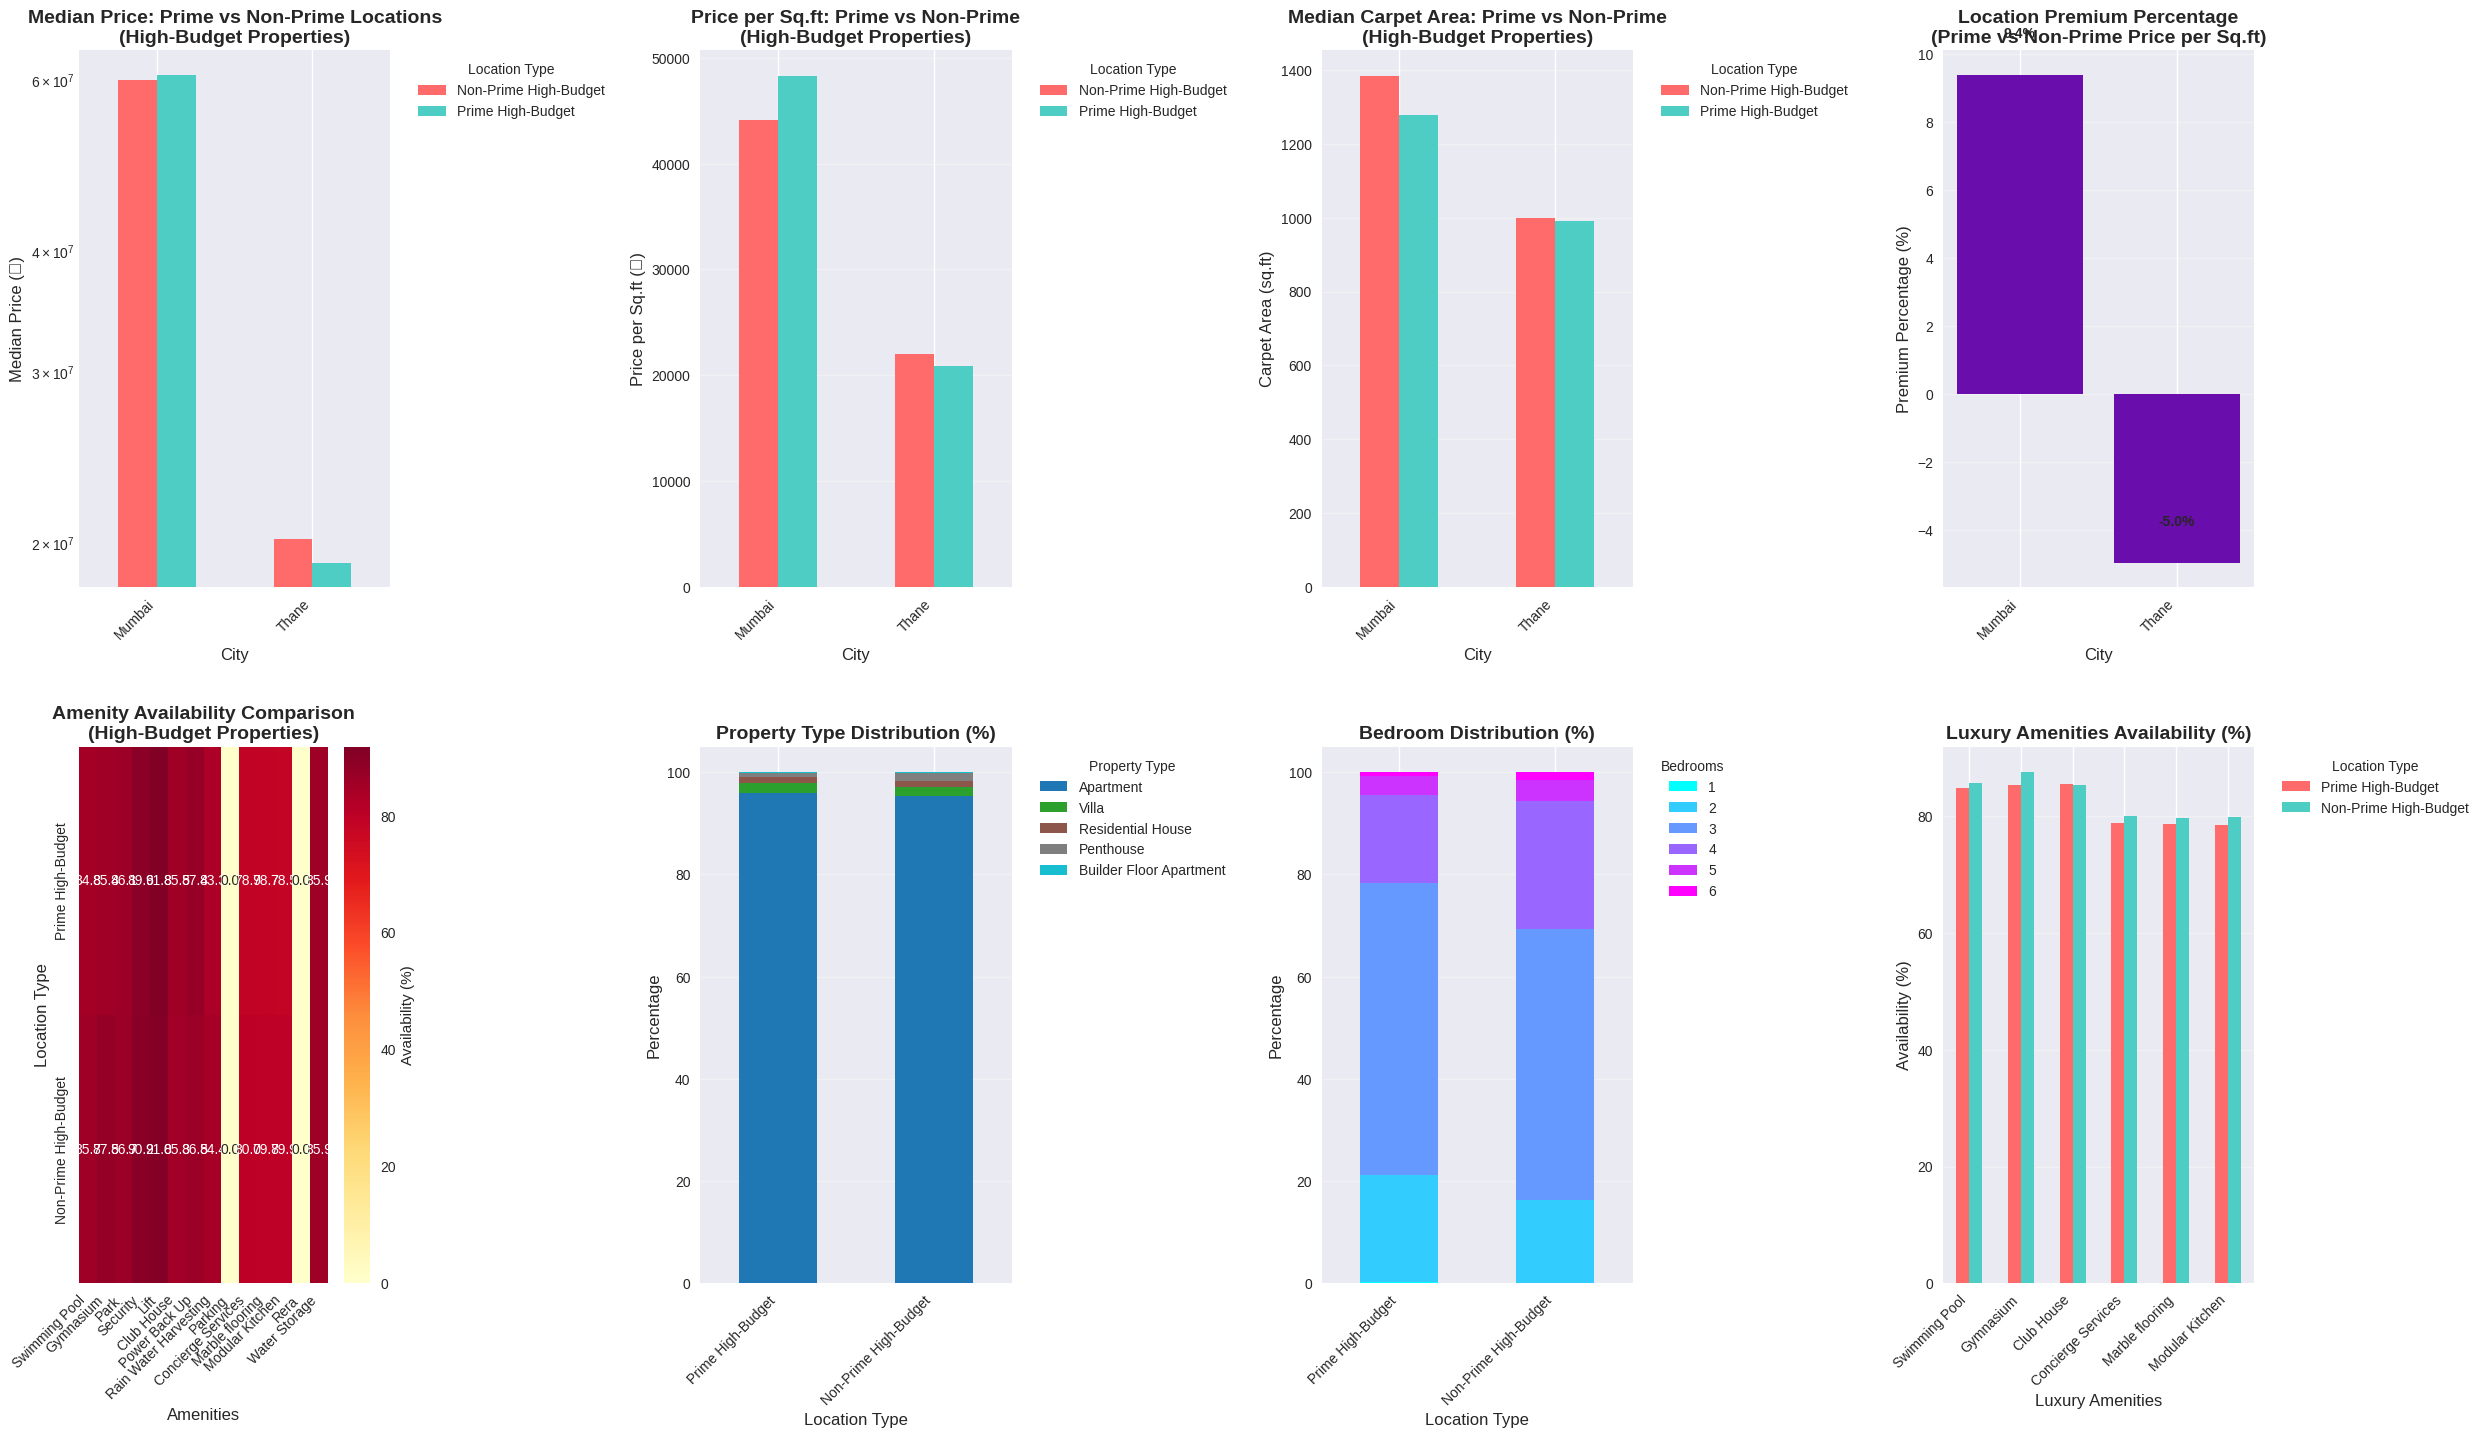

LOCATION-BASED PREMIUM ANALYSIS REPORT
Overall Statistics:
   • Prime High-Budget Properties: 888
   • Non-Prime High-Budget Properties: 1,606
   • Total High-Budget Properties Analyzed: 2,494

City-wise Analysis:

MUMBAI:
   • Prime Properties: 483
   • Non-Prime Properties: 1,266
   • Price Premium: 9.4%
   • Prime Price/sq.ft: ₹48270
   • Non-Prime Price/sq.ft: ₹44132

THANE:
   • Prime Properties: 405
   • Non-Prime Properties: 337
   • Price Premium: -5.0%
   • Prime Price/sq.ft: ₹20909
   • Non-Prime Price/sq.ft: ₹22000


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter
import warnings
warnings.filterwarnings('ignore')

# Set the style for better looking plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Load the dataset
df = pd.read_csv('M25_DA_A1_Dataset2.csv')

# Data cleaning and preparation
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')
df = df.dropna(subset=['Price', 'City', 'Area Name'])

# Convert carpet area to numeric if available
if 'Carpet Area' in df.columns:
    df['Carpet Area'] = pd.to_numeric(df['Carpet Area'], errors='coerce')

# Define prime locations based on the actual area names in your data
prime_locations = {
    'Mumbai': [
        'South Mumbai', 'Bandra', 'Juhu', 'Powai', 'Lower Parel', 'Worli', 'Malabar Hill',
        'Marine Lines', 'Churchgate', 'Nariman Point', 'Colaba', 'Cuffe Parade', 'Pedder Road',
        'Altamount Road', 'Breach Candy', 'Carmichael Road', 'Nepean Sea Road', 'Lokhandwala Complex',
        'Versova', 'Andheri West', 'Khar West', 'Santacruz West', 'Vile Parle West', 'Goregaon West',
        'Juhu Scheme', 'Pali Hill', 'Turner Road', 'Carter Road', 'Linking Road', 'Hill Road'
    ],
    'Thane': [
        'Hiranandani Estate', 'Kolshet Road', 'Manpada', 'Vrindavan', 'Pokhran Road', 'Ghodbunder Road',
        'Majiwada', 'Khopat', 'Naupada', 'Vartak Nagar', 'Panch Pakhdi', 'Waghbil', 'Brahmand',
        'Lok Puram', 'Louis Wadi', 'Patlipada', 'Anand Nagar', 'Vasant Vihar', 'Bhayandarpada',
        'Kasarvadavali', 'Ovala', 'Kavesar', 'Shil Phata', 'Mumbra', 'Diva', 'Kalwa', 'Airoli'
    ]
}

# Enhanced prime location identification function
def is_prime_location(row):
    city = row['City']
    area_name = str(row['Area Name']).strip()
    
    if city not in prime_locations:
        return False
    
    # Check for exact matches
    if area_name in prime_locations[city]:
        return True
    
    # Check for partial matches
    area_lower = area_name.lower()
    for prime_area in prime_locations[city]:
        if prime_area.lower() in area_lower or area_lower in prime_area.lower():
            return True
    
    # Special cases for known premium areas
    premium_indicators = [
        'hiranandani', 'estate', 'pokhran', 'ghodbunder', 'kolshet', 
        'manpada', 'vrindavan', 'majiwada', 'naupada', 'vartak'
    ]
    
    if any(indicator in area_lower for indicator in premium_indicators):
        return True
    
    return False

df['Is_Prime_Location'] = df.apply(is_prime_location, axis=1)

# Convert all amenity columns to numeric (0/1)
amenity_columns = [
    'Swimming Pool', 'Gymnasium', 'Park', 'Security', 'Lift', 'Club House',
    'Power Back Up', 'Rain Water Harvesting', 'Parking', 'Concierge Services',
    'Marble flooring', 'Modular Kitchen', 'Private pool', 'Rera', 'Water Storage'
]

for amenity in amenity_columns:
    if amenity in df.columns:
        df[amenity] = pd.to_numeric(df[amenity], errors='coerce')
        df[amenity] = df[amenity].fillna(0).apply(lambda x: 1 if x > 0 else 0)

# Calculate price per sqft if carpet area is available
if 'Carpet Area' in df.columns:
    df['Price_per_sqft'] = df['Price'] / df['Carpet Area']
    # Remove extreme outliers
    df = df[df['Price_per_sqft'] < df['Price_per_sqft'].quantile(0.99)]

# Define high-budget properties (top 25% by price in each city)
df['Is_High_Budget'] = df.groupby('City')['Price'].transform(
    lambda x: x > x.quantile(0.75)
)

# Create the target group: High-budget prime location properties
df['Target_Group'] = np.where(
    df['Is_High_Budget'] & df['Is_Prime_Location'], 
    'Prime High-Budget',
    np.where(
        df['Is_High_Budget'] & ~df['Is_Prime_Location'],
        'Non-Prime High-Budget',
        'Other'
    )
)

# Filter to only include high-budget properties for analysis
analysis_df = df[df['Is_High_Budget']].copy()

# Get available amenities after conversion
available_amenities = [a for a in amenity_columns if a in analysis_df.columns]

# Create visualizations
fig = plt.figure(figsize=(25, 20))

# 1. Price Comparison by City and Location Type
plt.subplot(3, 4, 1)
price_comparison = analysis_df.groupby(['City', 'Target_Group'])['Price'].median().unstack()
cities_with_data = price_comparison.dropna().index
price_comparison = price_comparison.loc[cities_with_data]

if not price_comparison.empty:
    price_comparison.plot(kind='bar', ax=plt.gca(), color=['#FF6B6B', '#4ECDC4'])
    plt.title('Median Price: Prime vs Non-Prime Locations\n(High-Budget Properties)', fontsize=14, fontweight='bold')
    plt.ylabel('Median Price (₹)', fontsize=12)
    plt.xlabel('City', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.yscale('log')
    plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, p: f'₹{x/1000000:.1f}M'))
    plt.legend(title='Location Type', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True, alpha=0.3, axis='y')
else:
    plt.text(0.5, 0.5, 'Insufficient data for price comparison', ha='center', va='center', fontsize=12)
    plt.title('Price Comparison Not Available', fontsize=14, fontweight='bold')

# 2. Price per Sq.ft Comparison
plt.subplot(3, 4, 2)
if 'Price_per_sqft' in analysis_df.columns:
    sqft_comparison = analysis_df.groupby(['City', 'Target_Group'])['Price_per_sqft'].median().unstack()
    sqft_comparison = sqft_comparison.loc[cities_with_data]
    
    if not sqft_comparison.empty:
        sqft_comparison.plot(kind='bar', ax=plt.gca(), color=['#FF6B6B', '#4ECDC4'])
        plt.title('Price per Sq.ft: Prime vs Non-Prime\n(High-Budget Properties)', fontsize=14, fontweight='bold')
        plt.ylabel('Price per Sq.ft (₹)', fontsize=12)
        plt.xlabel('City', fontsize=12)
        plt.xticks(rotation=45, ha='right')
        plt.legend(title='Location Type', bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.grid(True, alpha=0.3, axis='y')
    else:
        plt.text(0.5, 0.5, 'Insufficient data for sq.ft comparison', ha='center', va='center', fontsize=12)
        plt.title('Sq.ft Comparison Not Available', fontsize=14, fontweight='bold')
else:
    plt.text(0.5, 0.5, 'Carpet Area data not available', ha='center', va='center', fontsize=12)
    plt.title('Price per Sq.ft Not Available', fontsize=14, fontweight='bold')

# 3. Carpet Area Comparison
plt.subplot(3, 4, 3)
if 'Carpet Area' in analysis_df.columns:
    area_comparison = analysis_df.groupby(['City', 'Target_Group'])['Carpet Area'].median().unstack()
    area_comparison = area_comparison.loc[cities_with_data]
    
    if not area_comparison.empty:
        area_comparison.plot(kind='bar', ax=plt.gca(), color=['#FF6B6B', '#4ECDC4'])
        plt.title('Median Carpet Area: Prime vs Non-Prime\n(High-Budget Properties)', fontsize=14, fontweight='bold')
        plt.ylabel('Carpet Area (sq.ft)', fontsize=12)
        plt.xlabel('City', fontsize=12)
        plt.xticks(rotation=45, ha='right')
        plt.legend(title='Location Type', bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.grid(True, alpha=0.3, axis='y')
    else:
        plt.text(0.5, 0.5, 'Insufficient data for area comparison', ha='center', va='center', fontsize=12)
        plt.title('Area Comparison Not Available', fontsize=14, fontweight='bold')
else:
    plt.text(0.5, 0.5, 'Carpet Area data not available', ha='center', va='center', fontsize=12)
    plt.title('Area Comparison Not Available', fontsize=14, fontweight='bold')

# 4. Premium Percentage by City
plt.subplot(3, 4, 4)
if 'Price_per_sqft' in analysis_df.columns and not sqft_comparison.empty:
    premium_data = []
    for city in cities_with_data:
        if city in sqft_comparison.index:
            prime_price = sqft_comparison.loc[city, 'Prime High-Budget']
            non_prime_price = sqft_comparison.loc[city, 'Non-Prime High-Budget']
            if not pd.isna(prime_price) and not pd.isna(non_prime_price) and non_prime_price > 0:
                premium_pct = ((prime_price - non_prime_price) / non_prime_price) * 100
                premium_data.append({'City': city, 'Premium_Percentage': premium_pct})
    
    if premium_data:
        premium_df = pd.DataFrame(premium_data)
        plt.bar(premium_df['City'], premium_df['Premium_Percentage'], color='#6A0DAD')
        plt.title('Location Premium Percentage\n(Prime vs Non-Prime Price per Sq.ft)', fontsize=14, fontweight='bold')
        plt.ylabel('Premium Percentage (%)', fontsize=12)
        plt.xlabel('City', fontsize=12)
        plt.xticks(rotation=45, ha='right')
        plt.grid(True, alpha=0.3, axis='y')
        
        # Add value labels on bars
        for i, v in enumerate(premium_df['Premium_Percentage']):
            plt.text(i, v + 1, f'{v:.1f}%', ha='center', va='bottom', fontweight='bold')
    else:
        plt.text(0.5, 0.5, 'Insufficient data for premium calculation', ha='center', va='center', fontsize=12)
        plt.title('Premium Analysis Not Available', fontsize=14, fontweight='bold')
else:
    plt.text(0.5, 0.5, 'Price data not available for premium calculation', ha='center', va='center', fontsize=12)
    plt.title('Premium Analysis Not Available', fontsize=14, fontweight='bold')

# 5. Amenities Comparison Heatmap
plt.subplot(3, 4, 5)
if available_amenities:
    # Ensure all amenity columns are numeric
    for amenity in available_amenities:
        analysis_df[amenity] = pd.to_numeric(analysis_df[amenity], errors='coerce').fillna(0)
    
    amenity_comparison = analysis_df.groupby('Target_Group')[available_amenities].mean() * 100
    # Filter only the groups we want to compare
    amenity_comparison = amenity_comparison.loc[['Prime High-Budget', 'Non-Prime High-Budget']]
    
    sns.heatmap(amenity_comparison, annot=True, fmt='.1f', cmap='YlOrRd', 
                cbar_kws={'label': 'Availability (%)'})
    plt.title('Amenity Availability Comparison\n(High-Budget Properties)', fontsize=14, fontweight='bold')
    plt.xlabel('Amenities', fontsize=12)
    plt.ylabel('Location Type', fontsize=12)
    plt.xticks(rotation=45, ha='right')
else:
    plt.text(0.5, 0.5, 'Amenity data not available', ha='center', va='center', fontsize=12)
    plt.title('Amenity Comparison Not Available', fontsize=14, fontweight='bold')

# 6. Property Type Distribution
plt.subplot(3, 4, 6)
if 'Type of Property' in analysis_df.columns:
    prop_type_dist = pd.crosstab(analysis_df['Target_Group'], analysis_df['Type of Property'], normalize='index') * 100
    # Filter only the groups we want to compare
    prop_type_dist = prop_type_dist.loc[['Prime High-Budget', 'Non-Prime High-Budget']]
    
    # Get top 5 property types
    top_properties = prop_type_dist.sum().nlargest(5).index
    prop_type_dist = prop_type_dist[top_properties]
    
    prop_type_dist.plot(kind='bar', stacked=True, ax=plt.gca(), colormap='tab10')
    plt.title('Property Type Distribution (%)', fontsize=14, fontweight='bold')
    plt.ylabel('Percentage', fontsize=12)
    plt.xlabel('Location Type', fontsize=12)
    plt.legend(title='Property Type', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=45, ha='right')
    plt.grid(True, alpha=0.3, axis='y')
else:
    plt.text(0.5, 0.5, 'Property type data not available', ha='center', va='center', fontsize=12)
    plt.title('Property Type Comparison Not Available', fontsize=14, fontweight='bold')

# 7. Bedroom Distribution
plt.subplot(3, 4, 7)
if 'bedroom' in analysis_df.columns:
    bedroom_dist = pd.crosstab(analysis_df['Target_Group'], analysis_df['bedroom'], normalize='index') * 100
    # Filter only the groups we want to compare
    bedroom_dist = bedroom_dist.loc[['Prime High-Budget', 'Non-Prime High-Budget']]
    
    bedroom_dist.plot(kind='bar', stacked=True, ax=plt.gca(), colormap='cool')
    plt.title('Bedroom Distribution (%)', fontsize=14, fontweight='bold')
    plt.ylabel('Percentage', fontsize=12)
    plt.xlabel('Location Type', fontsize=12)
    plt.legend(title='Bedrooms', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=45, ha='right')
    plt.grid(True, alpha=0.3, axis='y')
else:
    plt.text(0.5, 0.5, 'Bedroom data not available', ha='center', va='center', fontsize=12)
    plt.title('Bedroom Comparison Not Available', fontsize=14, fontweight='bold')

# 8. Luxury Amenities Comparison
plt.subplot(3, 4, 8)
luxury_amenities = ['Swimming Pool', 'Gymnasium', 'Club House', 'Concierge Services', 
                   'Marble flooring', 'Modular Kitchen', 'Private pool']
available_luxury = [a for a in luxury_amenities if a in analysis_df.columns]

if available_luxury:
    # Ensure all luxury amenity columns are numeric
    for amenity in available_luxury:
        analysis_df[amenity] = pd.to_numeric(analysis_df[amenity], errors='coerce').fillna(0)
    
    luxury_comparison = analysis_df.groupby('Target_Group')[available_luxury].mean() * 100
    # Filter only the groups we want to compare
    luxury_comparison = luxury_comparison.loc[['Prime High-Budget', 'Non-Prime High-Budget']]
    
    luxury_comparison.T.plot(kind='bar', ax=plt.gca(), color=['#FF6B6B', '#4ECDC4'])
    plt.title('Luxury Amenities Availability (%)', fontsize=14, fontweight='bold')
    plt.ylabel('Availability (%)', fontsize=12)
    plt.xlabel('Luxury Amenities', fontsize=12)
    plt.legend(title='Location Type', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=45, ha='right')
    plt.grid(True, alpha=0.3, axis='y')
else:
    plt.text(0.5, 0.5, 'Luxury amenity data not available', ha='center', va='center', fontsize=12)
    plt.title('Luxury Amenities Not Available', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('location_premium_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# Generate detailed analysis report
print("=" * 80)
print("LOCATION-BASED PREMIUM ANALYSIS REPORT")
print("=" * 80)

# Overall statistics
prime_count = len(analysis_df[analysis_df['Target_Group'] == 'Prime High-Budget'])
non_prime_count = len(analysis_df[analysis_df['Target_Group'] == 'Non-Prime High-Budget'])

print(f"Overall Statistics:")
print(f"   • Prime High-Budget Properties: {prime_count:,}")
print(f"   • Non-Prime High-Budget Properties: {non_prime_count:,}")
print(f"   • Total High-Budget Properties Analyzed: {prime_count + non_prime_count:,}")

# City-wise analysis
print(f"\nCity-wise Analysis:")
for city in cities_with_data:
    city_data = analysis_df[analysis_df['City'] == city]
    prime_city = city_data[city_data['Target_Group'] == 'Prime High-Budget']
    non_prime_city = city_data[city_data['Target_Group'] == 'Non-Prime High-Budget']
    
    if len(prime_city) > 0 and len(non_prime_city) > 0:
        print(f"\n{city.upper()}:")
        print(f"   • Prime Properties: {len(prime_city):,}")
        print(f"   • Non-Prime Properties: {len(non_prime_city):,}")
        
        if 'Price_per_sqft' in analysis_df.columns:
            prime_price = prime_city['Price_per_sqft'].median()
            non_prime_price = non_prime_city['Price_per_sqft'].median()
            premium_pct = ((prime_price - non_prime_price) / non_prime_price) * 100
            
            print(f"   • Price Premium: {premium_pct:.1f}%")
            print(f"   • Prime Price/sq.ft: ₹{prime_price:.0f}")
            print(f"   • Non-Prime Price/sq.ft: ₹{non_prime_price:.0f}")

# print(f"\n✅ Analysis complete! Visualizations saved as 'location_premium_analysis.png'")

### QUESTION 4

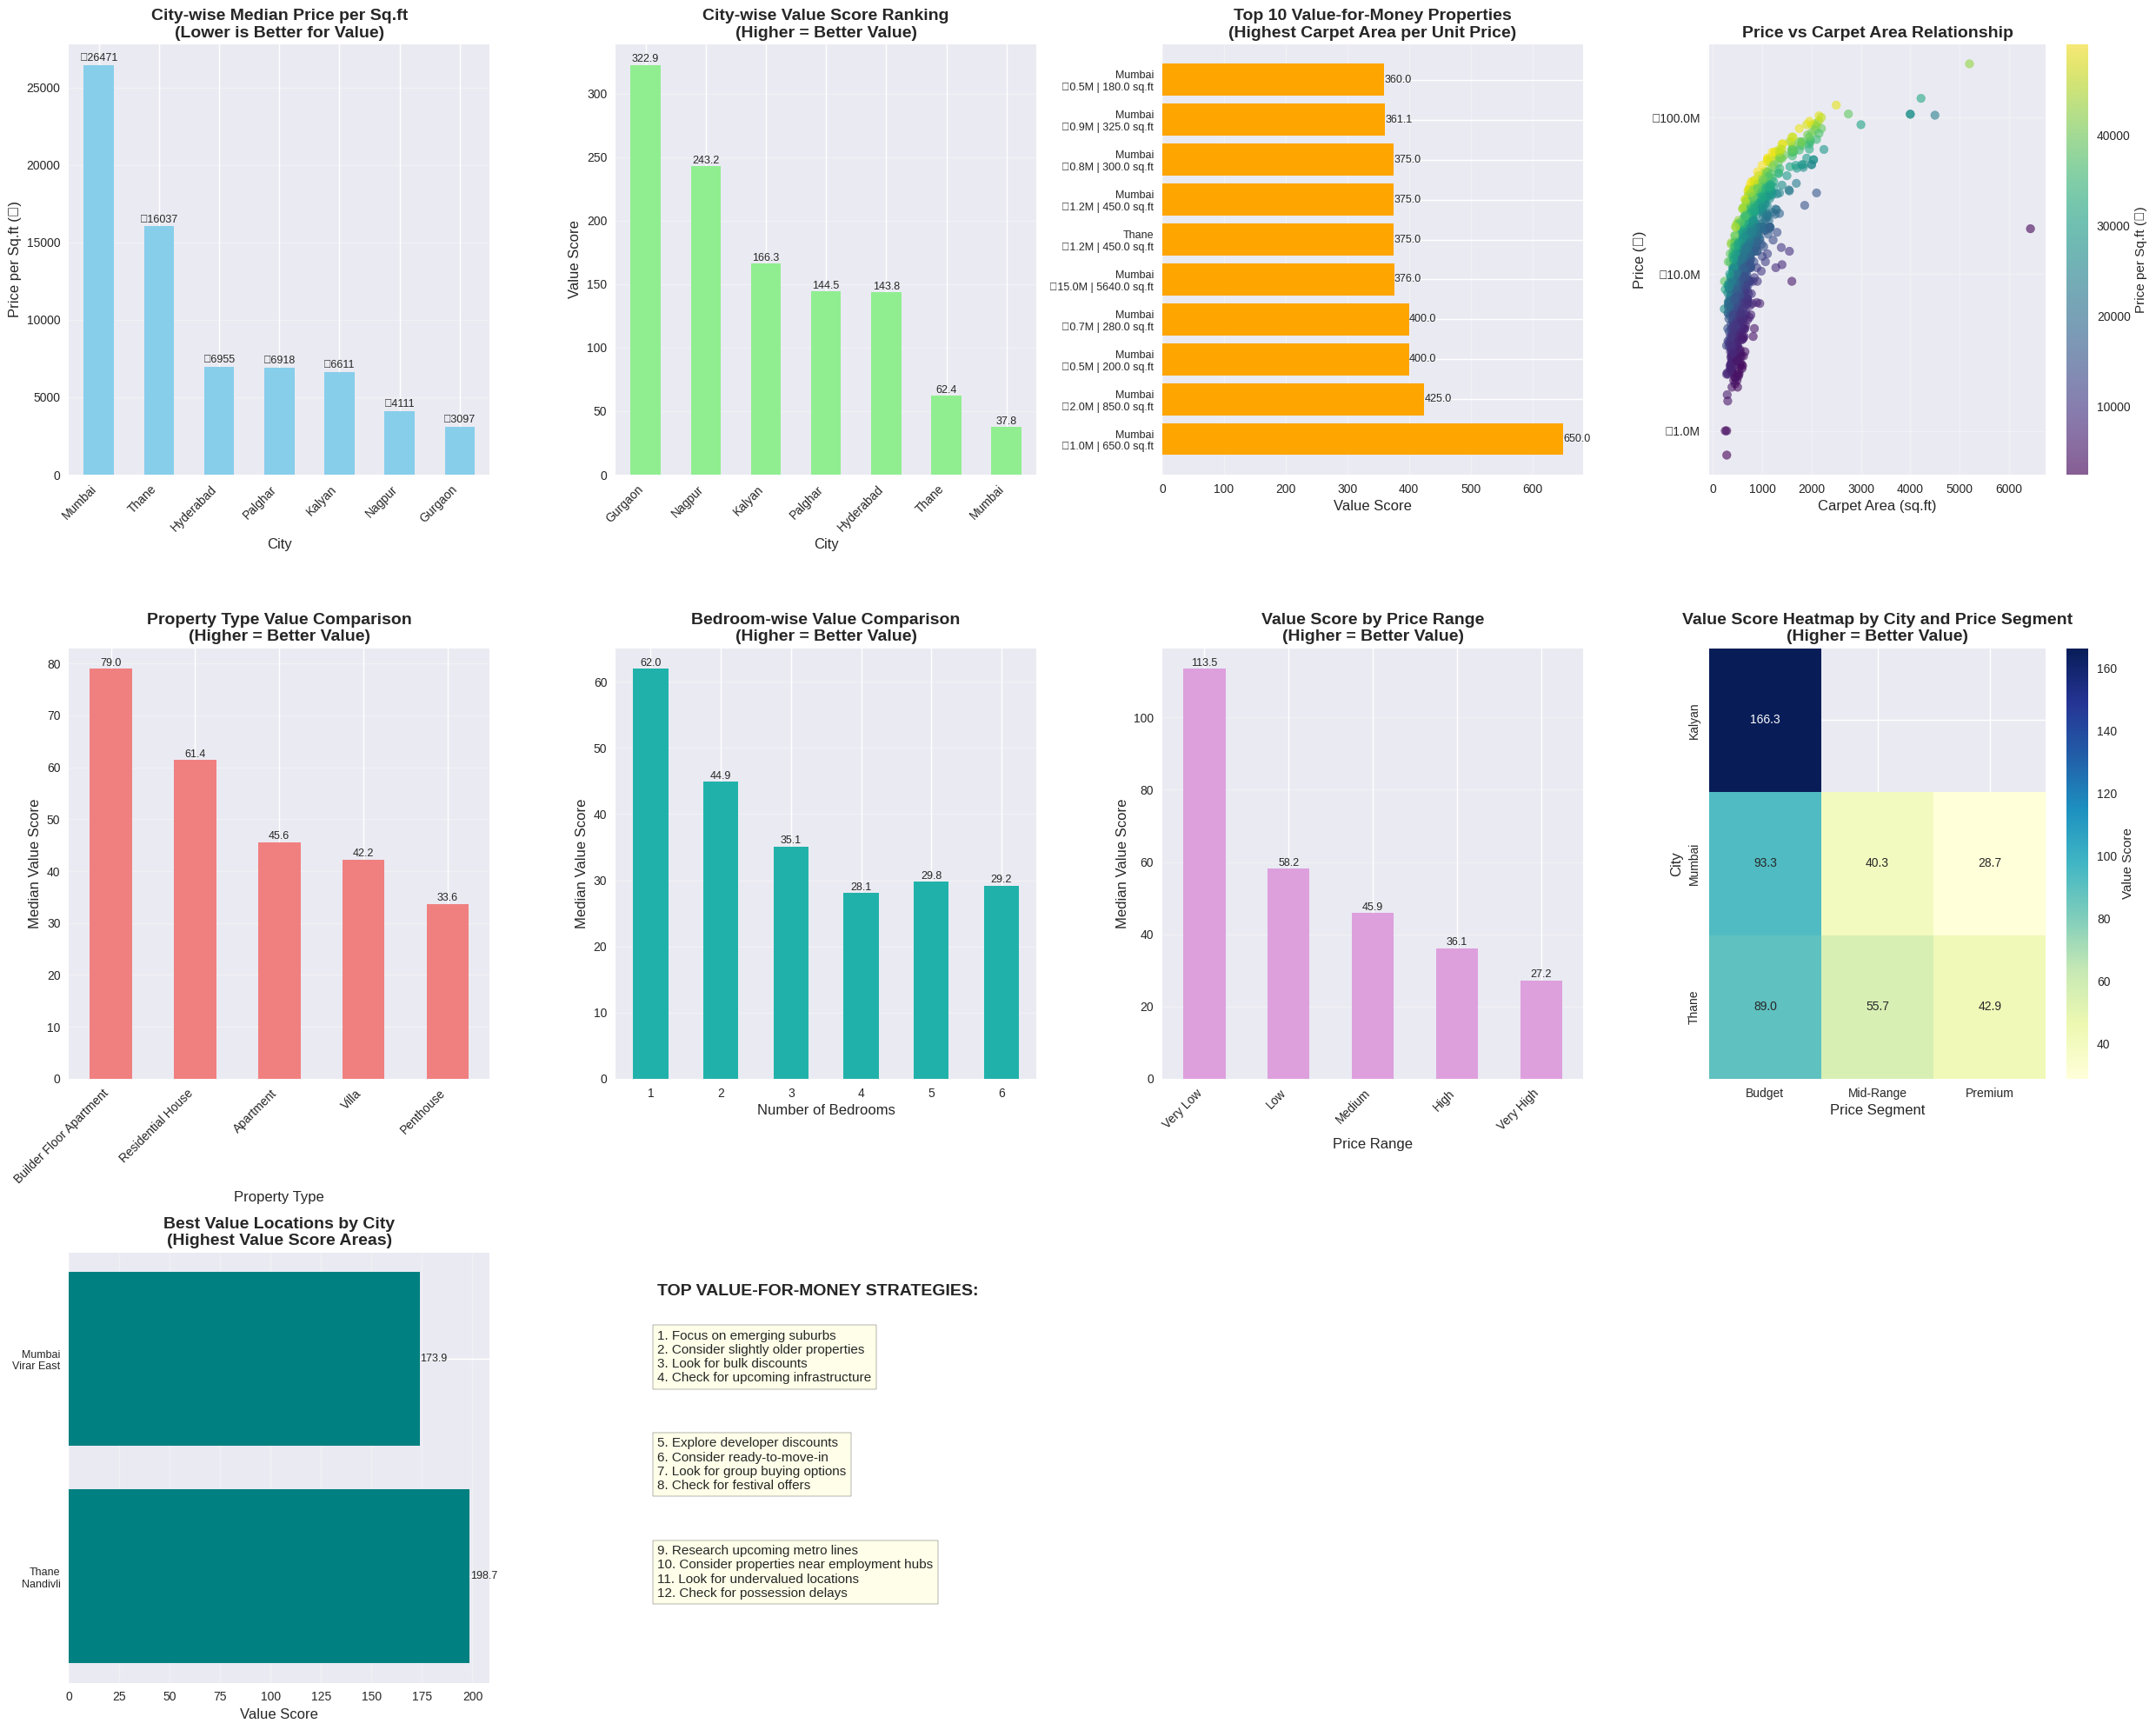

VALUE-FOR-MONEY ANALYSIS REPORT
Overall Statistics:
   • Total properties analyzed: 9,317
   • Cities covered: 7
   • Average price: ₹19,615,166
   • Average carpet area: 764 sq.ft
   • Average price per sq.ft: ₹23005

CITY-WISE VALUE RANKINGS:
Rank  City                 Value Score  Price/Sq.ft  Avg Area   Avg Price      
--------------------------------------------------------------------------------
1     Gurgaon              322.9        ₹3097       1130       ₹3.5          M
2     Nagpur               243.2        ₹4111       900        ₹3.7          M
3     Kalyan               166.3        ₹6611       492        ₹4.0          M
4     Palghar              144.5        ₹6918       795        ₹5.5          M
5     Hyderabad            143.8        ₹6955       1000       ₹7.7          M
6     Thane                62.4         ₹16037      620        ₹9.0          M
7     Mumbai               37.8         ₹26471      663        ₹17.5         M

BEST VALUE PROPERTY TYPES:
   1. Builder

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter
import warnings
warnings.filterwarnings('ignore')

# Set the style for better looking plots
plt.style.use('seaborn-v0_8')
sns.set_palette("viridis")

# Load the dataset
df = pd.read_csv('M25_DA_A1_Dataset2.csv')

# Data cleaning and preparation
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')
df = df.dropna(subset=['Price', 'City'])

# Convert carpet area to numeric if available
if 'Carpet Area' in df.columns:
    df['Carpet Area'] = pd.to_numeric(df['Carpet Area'], errors='coerce')
    # Remove extreme outliers
    df = df[(df['Carpet Area'] > 100) & (df['Carpet Area'] < 10000)]

# Calculate value metrics
if 'Carpet Area' in df.columns:
    # Calculate price per sqft
    df['Price_per_sqft'] = df['Price'] / df['Carpet Area']
    
    # Calculate value score (higher = better value)
    df['Value_Score'] = df['Carpet Area'] / df['Price'] * 1000000  # Normalized for better interpretation
    
    # Remove extreme outliers
    df = df[(df['Price_per_sqft'] > 1000) & (df['Price_per_sqft'] < 50000)]

# Filter only properties with valid carpet area and price data
value_df = df.dropna(subset=['Carpet Area', 'Price']).copy()

# Create visualizations
fig = plt.figure(figsize=(25, 20))
# plt.suptitle('VALUE-FOR-MONEY ANALYSIS: BEST REAL ESTATE OPPORTUNITIES ACROSS CITIES', 
#              fontsize=20, fontweight='bold', y=0.98)

# 1. City-wise Price per Sq.ft Comparison
plt.subplot(3, 4, 1)
if 'Price_per_sqft' in value_df.columns:
    city_price_sqft = value_df.groupby('City')['Price_per_sqft'].median().sort_values(ascending=False)
    city_price_sqft.plot(kind='bar', ax=plt.gca(), color='skyblue')
    plt.title('City-wise Median Price per Sq.ft\n(Lower is Better for Value)', fontsize=14, fontweight='bold')
    plt.ylabel('Price per Sq.ft (₹)', fontsize=12)
    plt.xlabel('City', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.grid(True, alpha=0.3, axis='y')
    
    # Add value labels
    for i, v in enumerate(city_price_sqft):
        plt.text(i, v + 100, f'₹{v:.0f}', ha='center', va='bottom', fontsize=9)
else:
    plt.text(0.5, 0.5, 'Carpet Area data not available', ha='center', va='center', fontsize=12)
    plt.title('Price per Sq.ft Analysis Not Available', fontsize=14, fontweight='bold')

# 2. City-wise Value Score Ranking
plt.subplot(3, 4, 2)
if 'Value_Score' in value_df.columns:
    city_value_score = value_df.groupby('City')['Value_Score'].median().sort_values(ascending=False)
    city_value_score.plot(kind='bar', ax=plt.gca(), color='lightgreen')
    plt.title('City-wise Value Score Ranking\n(Higher = Better Value)', fontsize=14, fontweight='bold')
    plt.ylabel('Value Score', fontsize=12)
    plt.xlabel('City', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.grid(True, alpha=0.3, axis='y')
    
    # Add value labels
    for i, v in enumerate(city_value_score):
        plt.text(i, v + 0.1, f'{v:.1f}', ha='center', va='bottom', fontsize=9)
else:
    plt.text(0.5, 0.5, 'Value score calculation not available', ha='center', va='center', fontsize=12)
    plt.title('Value Score Analysis Not Available', fontsize=14, fontweight='bold')

# 3. Top 10 Value-for-Money Properties
plt.subplot(3, 4, 3)
if 'Value_Score' in value_df.columns:
    top_value_properties = value_df.nlargest(10, 'Value_Score')[['City', 'Price', 'Carpet Area', 'Price_per_sqft', 'Value_Score']]
    top_value_properties['Label'] = top_value_properties.apply(
        lambda x: f"{x['City']}\n₹{x['Price']/1000000:.1f}M | {x['Carpet Area']} sq.ft", axis=1
    )
    
    plt.barh(range(len(top_value_properties)), top_value_properties['Value_Score'], color='orange')
    plt.title('Top 10 Value-for-Money Properties\n(Highest Carpet Area per Unit Price)', fontsize=14, fontweight='bold')
    plt.xlabel('Value Score', fontsize=12)
    plt.yticks(range(len(top_value_properties)), top_value_properties['Label'], fontsize=9)
    plt.grid(True, alpha=0.3, axis='x')
    
    # Add value labels
    for i, v in enumerate(top_value_properties['Value_Score']):
        plt.text(v + 0.1, i, f'{v:.1f}', ha='left', va='center', fontsize=9)
else:
    plt.text(0.5, 0.5, 'Value score calculation not available', ha='center', va='center', fontsize=12)
    plt.title('Top Properties Analysis Not Available', fontsize=14, fontweight='bold')

# 4. Price vs Carpet Area Scatter Plot
plt.subplot(3, 4, 4)
if 'Carpet Area' in value_df.columns:
    sample_data = value_df.sample(min(1000, len(value_df)), random_state=42)
    plt.scatter(sample_data['Carpet Area'], sample_data['Price'], alpha=0.6, c=sample_data['Price_per_sqft'] if 'Price_per_sqft' in value_df.columns else 'blue', cmap='viridis')
    plt.title('Price vs Carpet Area Relationship', fontsize=14, fontweight='bold')
    plt.xlabel('Carpet Area (sq.ft)', fontsize=12)
    plt.ylabel('Price (₹)', fontsize=12)
    plt.yscale('log')
    plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, p: f'₹{x/1000000:.1f}M'))
    
    if 'Price_per_sqft' in value_df.columns:
        plt.colorbar(label='Price per Sq.ft (₹)')
    plt.grid(True, alpha=0.3)
else:
    plt.text(0.5, 0.5, 'Carpet Area data not available', ha='center', va='center', fontsize=12)
    plt.title('Scatter Plot Not Available', fontsize=14, fontweight='bold')

# 5. Property Type Value Analysis
plt.subplot(3, 4, 5)
if 'Type of Property' in value_df.columns and 'Value_Score' in value_df.columns:
    prop_type_value = value_df.groupby('Type of Property')['Value_Score'].median().sort_values(ascending=False).head(10)
    prop_type_value.plot(kind='bar', ax=plt.gca(), color='lightcoral')
    plt.title('Property Type Value Comparison\n(Higher = Better Value)', fontsize=14, fontweight='bold')
    plt.ylabel('Median Value Score', fontsize=12)
    plt.xlabel('Property Type', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.grid(True, alpha=0.3, axis='y')
    
    # Add value labels
    for i, v in enumerate(prop_type_value):
        plt.text(i, v + 0.1, f'{v:.1f}', ha='center', va='bottom', fontsize=9)
else:
    plt.text(0.5, 0.5, 'Property type or value data not available', ha='center', va='center', fontsize=12)
    plt.title('Property Type Analysis Not Available', fontsize=14, fontweight='bold')

# 6. Bedroom-wise Value Analysis
plt.subplot(3, 4, 6)
if 'bedroom' in value_df.columns and 'Value_Score' in value_df.columns:
    bedroom_value = value_df.groupby('bedroom')['Value_Score'].median()
    bedroom_value.plot(kind='bar', ax=plt.gca(), color='lightseagreen')
    plt.title('Bedroom-wise Value Comparison\n(Higher = Better Value)', fontsize=14, fontweight='bold')
    plt.ylabel('Median Value Score', fontsize=12)
    plt.xlabel('Number of Bedrooms', fontsize=12)
    plt.xticks(rotation=0)
    plt.grid(True, alpha=0.3, axis='y')
    
    # Add value labels
    for i, v in enumerate(bedroom_value):
        plt.text(i, v + 0.1, f'{v:.1f}', ha='center', va='bottom', fontsize=9)
else:
    plt.text(0.5, 0.5, 'Bedroom or value data not available', ha='center', va='center', fontsize=12)
    plt.title('Bedroom Analysis Not Available', fontsize=14, fontweight='bold')

# 7. Price Range Value Analysis
plt.subplot(3, 4, 7)
if 'Value_Score' in value_df.columns:
    price_ranges = pd.qcut(value_df['Price'], q=5, labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])
    price_range_value = value_df.groupby(price_ranges)['Value_Score'].median()
    price_range_value.plot(kind='bar', ax=plt.gca(), color='plum')
    plt.title('Value Score by Price Range\n(Higher = Better Value)', fontsize=14, fontweight='bold')
    plt.ylabel('Median Value Score', fontsize=12)
    plt.xlabel('Price Range', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.grid(True, alpha=0.3, axis='y')
    
    # Add value labels
    for i, v in enumerate(price_range_value):
        plt.text(i, v + 0.1, f'{v:.1f}', ha='center', va='bottom', fontsize=9)
else:
    plt.text(0.5, 0.5, 'Value score calculation not available', ha='center', va='center', fontsize=12)
    plt.title('Price Range Analysis Not Available', fontsize=14, fontweight='bold')

# 8. City-wise Top Value Properties Heatmap
plt.subplot(3, 4, 8)
if 'Value_Score' in value_df.columns and len(value_df['City'].unique()) > 1:
    # Get top 3 cities by property count
    top_cities = value_df['City'].value_counts().head(3).index
    top_cities_data = value_df[value_df['City'].isin(top_cities)]
    
    # Create price segments
    price_segments = pd.qcut(top_cities_data['Price'], q=3, labels=['Budget', 'Mid-Range', 'Premium'])
    
    value_heatmap = top_cities_data.groupby(['City', price_segments])['Value_Score'].median().unstack()
    sns.heatmap(value_heatmap, annot=True, fmt='.1f', cmap='YlGnBu', 
                cbar_kws={'label': 'Value Score'})
    plt.title('Value Score Heatmap by City and Price Segment\n(Higher = Better Value)', fontsize=14, fontweight='bold')
    plt.xlabel('Price Segment', fontsize=12)
    plt.ylabel('City', fontsize=12)
else:
    plt.text(0.5, 0.5, 'Insufficient data for heatmap', ha='center', va='center', fontsize=12)
    plt.title('Heatmap Analysis Not Available', fontsize=14, fontweight='bold')

# 9. Best Value Locations within Cities
plt.subplot(3, 4, 9)
if 'Area Name' in value_df.columns and 'Value_Score' in value_df.columns:
    # Get top 5 cities
    top_cities = value_df['City'].value_counts().head(5).index
    
    best_locations = []
    for city in top_cities:
        city_data = value_df[value_df['City'] == city]
        if len(city_data) > 10:  # Only consider cities with sufficient data
            best_area = city_data.groupby('Area Name')['Value_Score'].median().idxmax()
            best_value = city_data.groupby('Area Name')['Value_Score'].median().max()
            best_locations.append({'City': city, 'Area': best_area, 'Value_Score': best_value})
    
    if best_locations:
        best_locations_df = pd.DataFrame(best_locations)
        best_locations_df = best_locations_df.sort_values('Value_Score', ascending=False)
        
        plt.barh(range(len(best_locations_df)), best_locations_df['Value_Score'], color='teal')
        plt.title('Best Value Locations by City\n(Highest Value Score Areas)', fontsize=14, fontweight='bold')
        plt.xlabel('Value Score', fontsize=12)
        plt.yticks(range(len(best_locations_df)), 
                  [f"{row['City']}\n{row['Area']}" for _, row in best_locations_df.iterrows()], 
                  fontsize=9)
        plt.grid(True, alpha=0.3, axis='x')
        
        # Add value labels
        for i, v in enumerate(best_locations_df['Value_Score']):
            plt.text(v + 0.1, i, f'{v:.1f}', ha='left', va='center', fontsize=9)
    else:
        plt.text(0.5, 0.5, 'Insufficient location data', ha='center', va='center', fontsize=12)
        plt.title('Location Analysis Not Available', fontsize=14, fontweight='bold')
else:
    plt.text(0.5, 0.5, 'Area name or value data not available', ha='center', va='center', fontsize=12)
    plt.title('Location Analysis Not Available', fontsize=14, fontweight='bold')

# 10. Value-for-Money Recommendations
plt.subplot(3, 4, 10)
recommendations = [
    "1. Focus on emerging suburbs\n2. Consider slightly older properties\n3. Look for bulk discounts\n4. Check for upcoming infrastructure",
    "5. Explore developer discounts\n6. Consider ready-to-move-in\n7. Look for group buying options\n8. Check for festival offers",
    "9. Research upcoming metro lines\n10. Consider properties near employment hubs\n11. Look for undervalued locations\n12. Check for possession delays"
]

plt.text(0.1, 0.9, 'TOP VALUE-FOR-MONEY STRATEGIES:', fontsize=14, fontweight='bold', transform=plt.gca().transAxes)
for i, rec in enumerate(recommendations):
    plt.text(0.1, 0.7 - i*0.25, rec, fontsize=11, transform=plt.gca().transAxes, 
             bbox=dict(facecolor='lightyellow', alpha=0.7))

plt.axis('off')
# plt.title('Investment Recommendations', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('value_for_money_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# Generate detailed value analysis report
print("=" * 80)
print("VALUE-FOR-MONEY ANALYSIS REPORT")
print("=" * 80)

# Overall statistics
print(f"Overall Statistics:")
print(f"   • Total properties analyzed: {len(value_df):,}")
print(f"   • Cities covered: {len(value_df['City'].unique())}")
print(f"   • Average price: ₹{value_df['Price'].mean():,.0f}")
if 'Carpet Area' in value_df.columns:
    print(f"   • Average carpet area: {value_df['Carpet Area'].mean():.0f} sq.ft")
if 'Price_per_sqft' in value_df.columns:
    print(f"   • Average price per sq.ft: ₹{value_df['Price_per_sqft'].mean():.0f}")

# City-wise rankings
print(f"\nCITY-WISE VALUE RANKINGS:")
if 'Value_Score' in value_df.columns:
    city_rankings = value_df.groupby('City').agg({
        'Value_Score': 'median',
        'Price_per_sqft': 'median',
        'Carpet Area': 'median',
        'Price': 'median'
    }).sort_values('Value_Score', ascending=False)
    
    print(f"{'Rank':<5} {'City':<20} {'Value Score':<12} {'Price/Sq.ft':<12} {'Avg Area':<10} {'Avg Price':<15}")
    print("-" * 80)
    
    for i, (city, data) in enumerate(city_rankings.head(10).iterrows(), 1):
        print(f"{i:<5} {city:<20} {data['Value_Score']:<12.1f} ₹{data['Price_per_sqft']:<10.0f} {data['Carpet Area']:<10.0f} ₹{data['Price']/1000000:<13.1f}M")

# Best value property types
print(f"\nBEST VALUE PROPERTY TYPES:")
if 'Type of Property' in value_df.columns and 'Value_Score' in value_df.columns:
    prop_type_rankings = value_df.groupby('Type of Property')['Value_Score'].median().sort_values(ascending=False)
    for i, (prop_type, score) in enumerate(prop_type_rankings.head(5).items(), 1):
        print(f"   {i}. {prop_type}: {score:.1f}")

# Best value locations
print(f"\nBEST VALUE LOCATIONS BY CITY:")
if 'Area Name' in value_df.columns:
    top_cities = value_df['City'].value_counts().head(5).index
    for city in top_cities:
        city_data = value_df[value_df['City'] == city]
        if len(city_data) > 10:
            best_area = city_data.groupby('Area Name')['Value_Score'].median().idxmax()
            best_score = city_data.groupby('Area Name')['Value_Score'].median().max()
            print(f"   • {city}: {best_area} (Value Score: {best_score:.1f})")

# Investment recommendations
print(f"\nTOP INVESTMENT RECOMMENDATIONS:")
print(f"   1. Focus on cities with high value scores: {', '.join(city_rankings.head(3).index.tolist())}")
print(f"   2. Consider {prop_type_rankings.index[0]} properties for best value")
print(f"   3. Target emerging suburbs with upcoming infrastructure")
print(f"   4. Look for properties with high carpet area to price ratio")
print(f"   5. Consider ready-to-move-in properties to avoid rental costs")

# Budget-conscious investor tips
print(f"\nBUDGET-CONSCIOUS INVESTOR TIPS:")
print(f"   • Price Range: ₹{value_df['Price'].quantile(0.25):,.0f} - ₹{value_df['Price'].quantile(0.75):,.0f}")
print(f"   • Target Price/Sq.ft: < ₹{value_df['Price_per_sqft'].median():.0f}")
print(f"   • Ideal Carpet Area: {value_df['Carpet Area'].quantile(0.5):.0f} - {value_df['Carpet Area'].quantile(0.75):.0f} sq.ft")

# print(f"\n✅ Analysis complete! Visualizations saved as 'value_for_money_analysis.png'")

# # Save top value properties to CSV for further analysis
# if 'Value_Score' in value_df.columns:
#     top_value_properties = value_df.nlargest(50, 'Value_Score')[
#         ['City', 'Area Name', 'Type of Property', 'bedroom', 'Price', 'Carpet Area', 'Price_per_sqft', 'Value_Score']
#     ]
#     top_value_properties.to_csv('top_value_properties.csv', index=False)
#     print(f"💾 Top 50 value properties saved to 'top_value_properties.csv'")

### QUESTION 5

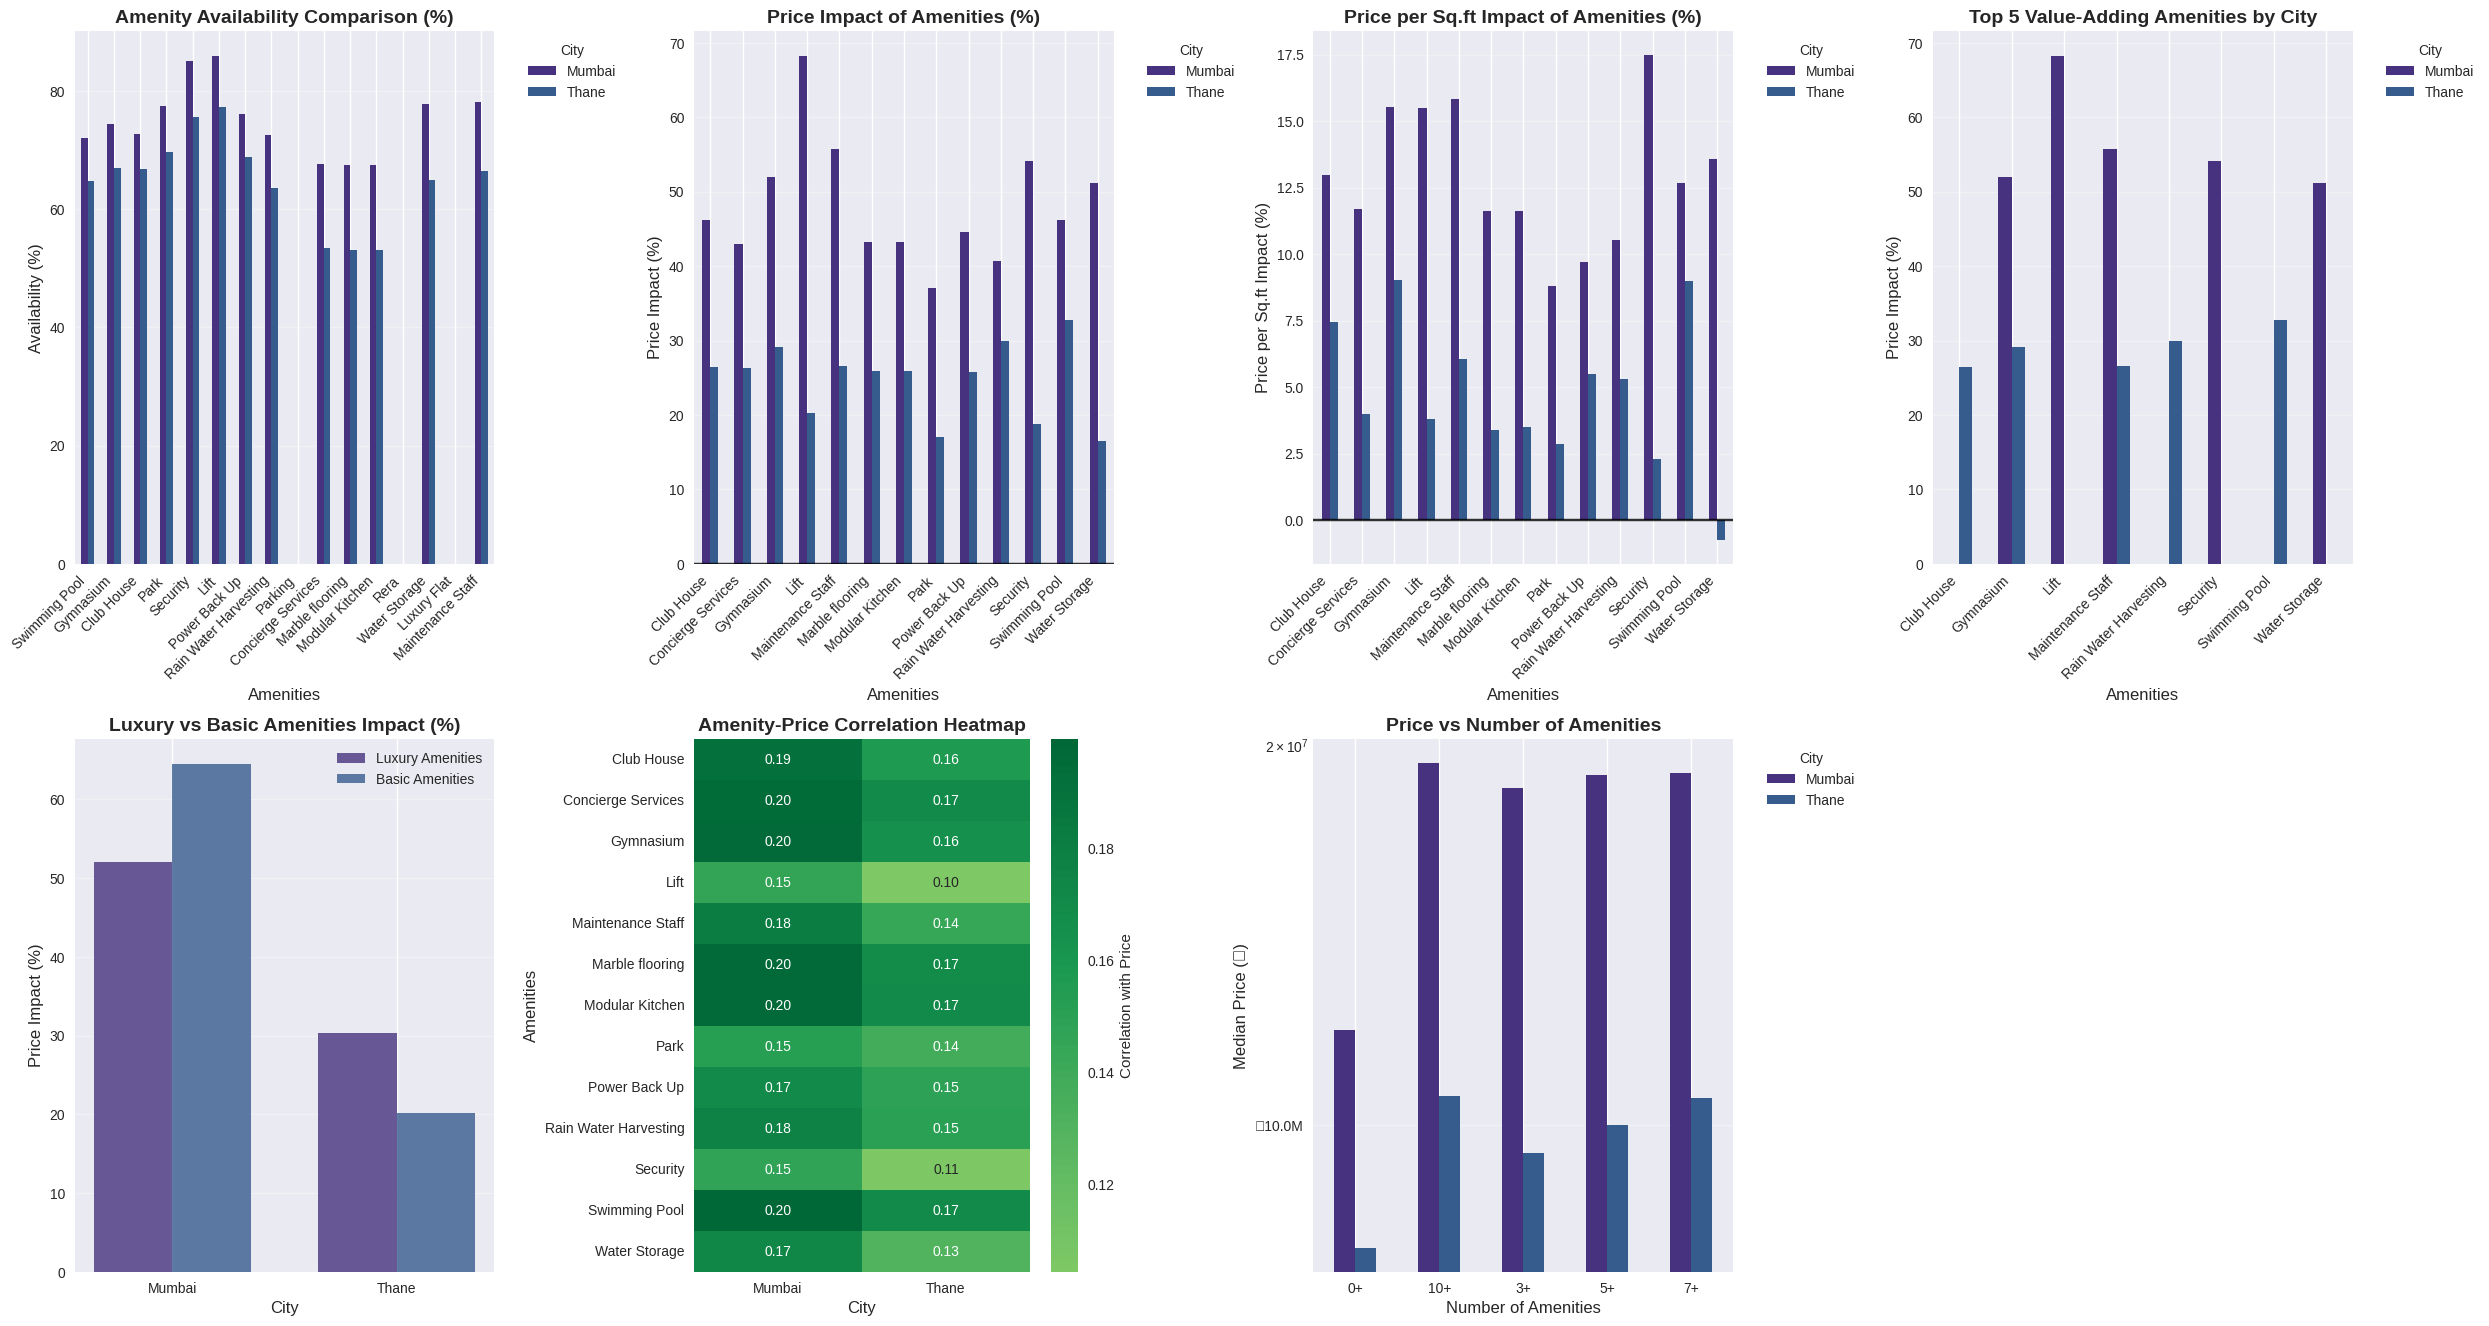

AMENITY IMPACT ON PROPERTY PRICES ANALYSIS
Overall Statistics:
   • Total properties analyzed: 9,306
   • Mumbai properties: 6,331
   • Thane properties: 2,975
   • Amenities analyzed: 16

TOP VALUE-ADDING AMENITIES:

MUMBAI:
   1. Lift: 68.2% price impact
   2. Maintenance Staff: 55.7% price impact
   3. Security: 54.2% price impact
   4. Gymnasium: 52.0% price impact
   5. Water Storage: 51.2% price impact

THANE:
   1. Swimming Pool: 32.7% price impact
   2. Rain Water Harvesting: 30.0% price impact
   3. Gymnasium: 29.1% price impact
   4. Maintenance Staff: 26.6% price impact
   5. Club House: 26.4% price impact

CITY COMPARISON:
   • Swimming Pool: Mumbai 46.2% vs Thane 32.7% (Diff: 13.4%)
   • Gymnasium: Mumbai 52.0% vs Thane 29.1% (Diff: 22.9%)
   • Club House: Mumbai 46.2% vs Thane 26.4% (Diff: 19.8%)
   • Park: Mumbai 37.0% vs Thane 17.1% (Diff: 20.0%)
   • Security: Mumbai 54.2% vs Thane 18.8% (Diff: 35.4%)
   • Lift: Mumbai 68.2% vs Thane 20.3% (Diff: 47.9%)
   • Power Back

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter
import warnings
warnings.filterwarnings('ignore')

# Set the style for better looking plots
plt.style.use('seaborn-v0_8')
sns.set_palette("viridis")

# Load the dataset
df = pd.read_csv('M25_DA_A1_Dataset2.csv')

# Data cleaning and preparation
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')
df = df.dropna(subset=['Price', 'City'])

# Filter for Mumbai and Thane
cities_to_analyze = ['Mumbai', 'Thane']
df_cities = df[df['City'].isin(cities_to_analyze)].copy()

# Define the amenities to analyze
amenities = [
    'Swimming Pool', 'Gymnasium', 'Club House', 'Park', 'Security',
    'Lift', 'Power Back Up', 'Rain Water Harvesting', 'Parking',
    'Concierge Services', 'Marble flooring', 'Modular Kitchen',
    'Rera', 'Water Storage', 'Luxury Flat', 'Maintenance Staff'
]

# Convert all amenity columns to numeric (0/1)
for amenity in amenities:
    if amenity in df_cities.columns:
        df_cities[amenity] = pd.to_numeric(df_cities[amenity], errors='coerce')
        df_cities[amenity] = df_cities[amenity].fillna(0).apply(lambda x: 1 if x > 0 else 0)

# Calculate price per sqft if carpet area is available
if 'Carpet Area' in df_cities.columns:
    df_cities['Carpet Area'] = pd.to_numeric(df_cities['Carpet Area'], errors='coerce')
    df_cities['Price_per_sqft'] = df_cities['Price'] / df_cities['Carpet Area']
    # Remove extreme outliers
    df_cities = df_cities[(df_cities['Price_per_sqft'] > 1000) & (df_cities['Price_per_sqft'] < 50000)]

# Get available amenities
available_amenities = [a for a in amenities if a in df_cities.columns]

# Create visualizations
fig = plt.figure(figsize=(25, 20))
# plt.suptitle('AMENITY IMPACT ON PROPERTY PRICES: MUMBAI vs THANE', 
#              fontsize=20, fontweight='bold', y=0.98)

# 1. Amenity Availability Comparison
plt.subplot(3, 4, 1)
if available_amenities:
    amenity_availability = df_cities.groupby('City')[available_amenities].mean() * 100
    amenity_availability.T.plot(kind='bar', ax=plt.gca())
    plt.title('Amenity Availability Comparison (%)', fontsize=14, fontweight='bold')
    plt.ylabel('Availability (%)', fontsize=12)
    plt.xlabel('Amenities', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='City', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True, alpha=0.3, axis='y')
else:
    plt.text(0.5, 0.5, 'Amenity data not available', ha='center', va='center', fontsize=12)
    plt.title('Amenity Availability Not Available', fontsize=14, fontweight='bold')

# 2. Price Impact of Amenities
plt.subplot(3, 4, 2)
if available_amenities:
    amenity_price_impact = []
    for amenity in available_amenities:
        for city in cities_to_analyze:
            city_data = df_cities[df_cities['City'] == city]
            with_amenity = city_data[city_data[amenity] == 1]['Price'].median()
            without_amenity = city_data[city_data[amenity] == 0]['Price'].median()
            
            if not pd.isna(with_amenity) and not pd.isna(without_amenity) and without_amenity > 0:
                impact_pct = ((with_amenity - without_amenity) / without_amenity) * 100
                amenity_price_impact.append({
                    'Amenity': amenity,
                    'City': city,
                    'Impact_Percentage': impact_pct
                })
    
    if amenity_price_impact:
        impact_df = pd.DataFrame(amenity_price_impact)
        pivot_impact = impact_df.pivot(index='Amenity', columns='City', values='Impact_Percentage')
        
        pivot_impact.plot(kind='bar', ax=plt.gca())
        plt.title('Price Impact of Amenities (%)', fontsize=14, fontweight='bold')
        plt.ylabel('Price Impact (%)', fontsize=12)
        plt.xlabel('Amenities', fontsize=12)
        plt.xticks(rotation=45, ha='right')
        plt.legend(title='City', bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.grid(True, alpha=0.3, axis='y')
        plt.axhline(y=0, color='black', linestyle='-', alpha=0.8)
    else:
        plt.text(0.5, 0.5, 'Insufficient data for impact analysis', ha='center', va='center', fontsize=12)
        plt.title('Price Impact Analysis Not Available', fontsize=14, fontweight='bold')
else:
    plt.text(0.5, 0.5, 'Amenity data not available', ha='center', va='center', fontsize=12)
    plt.title('Price Impact Analysis Not Available', fontsize=14, fontweight='bold')

# 3. Price per Sq.ft Impact
plt.subplot(3, 4, 3)
if available_amenities and 'Price_per_sqft' in df_cities.columns:
    amenity_pps_impact = []
    for amenity in available_amenities:
        for city in cities_to_analyze:
            city_data = df_cities[df_cities['City'] == city]
            with_amenity = city_data[city_data[amenity] == 1]['Price_per_sqft'].median()
            without_amenity = city_data[city_data[amenity] == 0]['Price_per_sqft'].median()
            
            if not pd.isna(with_amenity) and not pd.isna(without_amenity) and without_amenity > 0:
                impact_pct = ((with_amenity - without_amenity) / without_amenity) * 100
                amenity_pps_impact.append({
                    'Amenity': amenity,
                    'City': city,
                    'Impact_Percentage': impact_pct
                })
    
    if amenity_pps_impact:
        pps_impact_df = pd.DataFrame(amenity_pps_impact)
        pivot_pps = pps_impact_df.pivot(index='Amenity', columns='City', values='Impact_Percentage')
        
        pivot_pps.plot(kind='bar', ax=plt.gca())
        plt.title('Price per Sq.ft Impact of Amenities (%)', fontsize=14, fontweight='bold')
        plt.ylabel('Price per Sq.ft Impact (%)', fontsize=12)
        plt.xlabel('Amenities', fontsize=12)
        plt.xticks(rotation=45, ha='right')
        plt.legend(title='City', bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.grid(True, alpha=0.3, axis='y')
        plt.axhline(y=0, color='black', linestyle='-', alpha=0.8)
    else:
        plt.text(0.5, 0.5, 'Insufficient data for PPS analysis', ha='center', va='center', fontsize=12)
        plt.title('PPS Impact Analysis Not Available', fontsize=14, fontweight='bold')
else:
    plt.text(0.5, 0.5, 'Amenity or PPS data not available', ha='center', va='center', fontsize=12)
    plt.title('PPS Impact Analysis Not Available', fontsize=14, fontweight='bold')

# 4. Top 5 Value-Adding Amenities by City
plt.subplot(3, 4, 4)
if available_amenities:
    top_amenities_data = []
    for city in cities_to_analyze:
        city_data = df_cities[df_cities['City'] == city]
        amenity_impact = []
        for amenity in available_amenities:
            with_amenity = city_data[city_data[amenity] == 1]['Price'].median()
            without_amenity = city_data[city_data[amenity] == 0]['Price'].median()
            
            if not pd.isna(with_amenity) and not pd.isna(without_amenity) and without_amenity > 0:
                impact_pct = ((with_amenity - without_amenity) / without_amenity) * 100
                amenity_impact.append((amenity, impact_pct))
        
        # Get top 5 amenities by impact
        amenity_impact.sort(key=lambda x: x[1], reverse=True)
        for amenity, impact in amenity_impact[:5]:
            top_amenities_data.append({'City': city, 'Amenity': amenity, 'Impact': impact})
    
    if top_amenities_data:
        top_amenities_df = pd.DataFrame(top_amenities_data)
        pivot_top = top_amenities_df.pivot(index='Amenity', columns='City', values='Impact')
        
        pivot_top.plot(kind='bar', ax=plt.gca())
        plt.title('Top 5 Value-Adding Amenities by City', fontsize=14, fontweight='bold')
        plt.ylabel('Price Impact (%)', fontsize=12)
        plt.xlabel('Amenities', fontsize=12)
        plt.xticks(rotation=45, ha='right')
        plt.legend(title='City', bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.grid(True, alpha=0.3, axis='y')
    else:
        plt.text(0.5, 0.5, 'Insufficient data for top amenities', ha='center', va='center', fontsize=12)
        plt.title('Top Amenities Analysis Not Available', fontsize=14, fontweight='bold')
else:
    plt.text(0.5, 0.5, 'Amenity data not available', ha='center', va='center', fontsize=12)
    plt.title('Top Amenities Analysis Not Available', fontsize=14, fontweight='bold')

# 5. Luxury vs Basic Amenities Comparison
plt.subplot(3, 4, 5)
luxury_amenities = ['Swimming Pool', 'Gymnasium', 'Club House', 'Concierge Services', 'Luxury Flat']
basic_amenities = ['Security', 'Lift', 'Parking', 'Water Storage', 'Power Back Up']

available_luxury = [a for a in luxury_amenities if a in available_amenities]
available_basic = [a for a in basic_amenities if a in available_amenities]

if available_luxury and available_basic:
    luxury_impact = []
    basic_impact = []
    
    for city in cities_to_analyze:
        city_data = df_cities[df_cities['City'] == city]
        
        # Calculate luxury amenities impact
        luxury_score = city_data[available_luxury].sum(axis=1)
        high_luxury = city_data[luxury_score >= len(available_luxury)//2]['Price'].median()
        low_luxury = city_data[luxury_score < len(available_luxury)//2]['Price'].median()
        
        if not pd.isna(high_luxury) and not pd.isna(low_luxury) and low_luxury > 0:
            luxury_impact.append((city, ((high_luxury - low_luxury) / low_luxury) * 100))
        
        # Calculate basic amenities impact
        basic_score = city_data[available_basic].sum(axis=1)
        high_basic = city_data[basic_score >= len(available_basic)//2]['Price'].median()
        low_basic = city_data[basic_score < len(available_basic)//2]['Price'].median()
        
        if not pd.isna(high_basic) and not pd.isna(low_basic) and low_basic > 0:
            basic_impact.append((city, ((high_basic - low_basic) / low_basic) * 100))
    
    if luxury_impact and basic_impact:
        luxury_cities, luxury_values = zip(*luxury_impact)
        basic_cities, basic_values = zip(*basic_impact)
        
        x = np.arange(len(luxury_cities))
        width = 0.35
        
        plt.bar(x - width/2, luxury_values, width, label='Luxury Amenities', alpha=0.8)
        plt.bar(x + width/2, basic_values, width, label='Basic Amenities', alpha=0.8)
        
        plt.title('Luxury vs Basic Amenities Impact (%)', fontsize=14, fontweight='bold')
        plt.ylabel('Price Impact (%)', fontsize=12)
        plt.xlabel('City', fontsize=12)
        plt.xticks(x, luxury_cities)
        plt.legend()
        plt.grid(True, alpha=0.3, axis='y')
    else:
        plt.text(0.5, 0.5, 'Insufficient data for luxury/basic analysis', ha='center', va='center', fontsize=12)
        plt.title('Luxury/Basic Analysis Not Available', fontsize=14, fontweight='bold')
else:
    plt.text(0.5, 0.5, 'Luxury/basic amenity data not available', ha='center', va='center', fontsize=12)
    plt.title('Luxury/Basic Analysis Not Available', fontsize=14, fontweight='bold')

# 6. Amenity Correlation Heatmap
plt.subplot(3, 4, 6)
if available_amenities and 'Price' in df_cities.columns:
    # Calculate correlation between amenities and price
    correlation_data = []
    for amenity in available_amenities:
        for city in cities_to_analyze:
            city_data = df_cities[df_cities['City'] == city]
            correlation = city_data[amenity].corr(city_data['Price'])
            if not pd.isna(correlation):
                correlation_data.append({'Amenity': amenity, 'City': city, 'Correlation': correlation})
    
    if correlation_data:
        corr_df = pd.DataFrame(correlation_data)
        corr_pivot = corr_df.pivot(index='Amenity', columns='City', values='Correlation')
        
        sns.heatmap(corr_pivot, annot=True, fmt='.2f', cmap='RdYlGn', center=0,
                   cbar_kws={'label': 'Correlation with Price'})
        plt.title('Amenity-Price Correlation Heatmap', fontsize=14, fontweight='bold')
        plt.xlabel('City', fontsize=12)
        plt.ylabel('Amenities', fontsize=12)
    else:
        plt.text(0.5, 0.5, 'Insufficient data for correlation', ha='center', va='center', fontsize=12)
        plt.title('Correlation Analysis Not Available', fontsize=14, fontweight='bold')
else:
    plt.text(0.5, 0.5, 'Amenity or price data not available', ha='center', va='center', fontsize=12)
    plt.title('Correlation Analysis Not Available', fontsize=14, fontweight='bold')

# 7. Amenity Bundle Analysis
plt.subplot(3, 4, 7)
if available_amenities:
    df_cities['Total_Amenities'] = df_cities[available_amenities].sum(axis=1)
    
    bundle_impact = []
    for city in cities_to_analyze:
        city_data = df_cities[df_cities['City'] == city]
        for num_amenities in [0, 3, 5, 7, 10]:
            if num_amenities == 0:
                subset = city_data[city_data['Total_Amenities'] == num_amenities]
            else:
                subset = city_data[city_data['Total_Amenities'] >= num_amenities]
            
            if len(subset) > 10:
                median_price = subset['Price'].median()
                bundle_impact.append({
                    'City': city,
                    'Num_Amenities': f'{num_amenities}+',
                    'Median_Price': median_price
                })
    
    if bundle_impact:
        bundle_df = pd.DataFrame(bundle_impact)
        pivot_bundle = bundle_df.pivot(index='Num_Amenities', columns='City', values='Median_Price')
        
        pivot_bundle.plot(kind='bar', ax=plt.gca())
        plt.title('Price vs Number of Amenities', fontsize=14, fontweight='bold')
        plt.ylabel('Median Price (₹)', fontsize=12)
        plt.xlabel('Number of Amenities', fontsize=12)
        plt.xticks(rotation=0)
        plt.yscale('log')
        plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, p: f'₹{x/1000000:.1f}M'))
        plt.legend(title='City', bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.grid(True, alpha=0.3, axis='y')
    else:
        plt.text(0.5, 0.5, 'Insufficient data for bundle analysis', ha='center', va='center', fontsize=12)
        plt.title('Bundle Analysis Not Available', fontsize=14, fontweight='bold')
else:
    plt.text(0.5, 0.5, 'Amenity data not available', ha='center', va='center', fontsize=12)
    plt.title('Bundle Analysis Not Available', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('amenity_impact_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# Generate detailed analysis report
print("=" * 80)
print("AMENITY IMPACT ON PROPERTY PRICES ANALYSIS")
print("=" * 80)

# Overall statistics
print(f"Overall Statistics:")
print(f"   • Total properties analyzed: {len(df_cities):,}")
print(f"   • Mumbai properties: {len(df_cities[df_cities['City'] == 'Mumbai']):,}")
print(f"   • Thane properties: {len(df_cities[df_cities['City'] == 'Thane']):,}")
print(f"   • Amenities analyzed: {len(available_amenities)}")

# Top value-adding amenities
print(f"\nTOP VALUE-ADDING AMENITIES:")
for city in cities_to_analyze:
    city_data = df_cities[df_cities['City'] == city]
    amenity_impact = []
    
    for amenity in available_amenities:
        with_amenity = city_data[city_data[amenity] == 1]['Price'].median()
        without_amenity = city_data[city_data[amenity] == 0]['Price'].median()
        
        if not pd.isna(with_amenity) and not pd.isna(without_amenity) and without_amenity > 0:
            impact_pct = ((with_amenity - without_amenity) / without_amenity) * 100
            amenity_impact.append((amenity, impact_pct))
    
    if amenity_impact:
        amenity_impact.sort(key=lambda x: x[1], reverse=True)
        print(f"\n{city.upper()}:")
        for i, (amenity, impact) in enumerate(amenity_impact[:5], 1):
            print(f"   {i}. {amenity}: {impact:.1f}% price impact")

# City comparison
print(f"\nCITY COMPARISON:")
for amenity in available_amenities[:10]:  # Show first 10 amenities
    mumbai_impact = None
    thane_impact = None
    
    for city in cities_to_analyze:
        city_data = df_cities[df_cities['City'] == city]
        with_amenity = city_data[city_data[amenity] == 1]['Price'].median()
        without_amenity = city_data[city_data[amenity] == 0]['Price'].median()
        
        if not pd.isna(with_amenity) and not pd.isna(without_amenity) and without_amenity > 0:
            impact = ((with_amenity - without_amenity) / without_amenity) * 100
            if city == 'Mumbai':
                mumbai_impact = impact
            else:
                thane_impact = impact
    
    if mumbai_impact is not None and thane_impact is not None:
        difference = mumbai_impact - thane_impact
        print(f"   • {amenity}: Mumbai {mumbai_impact:.1f}% vs Thane {thane_impact:.1f}% (Diff: {difference:.1f}%)")

# Investment recommendations
print(f"\nINVESTMENT RECOMMENDATIONS:")

print(f"\nPRIORITY AMENITIES:")
print(f"   • Focus on amenities with highest price impact")
print(f"   • Consider local preferences in each city")
print(f"   • Evaluate cost vs value addition")

print(f"\nDEVELOPMENT STRATEGIES:")
print(f"   • Include high-impact amenities in premium projects")
print(f"   • Balance luxury and basic amenities")
print(f"   • Consider bundled amenity packages")

print(f"\nBUDGET ALLOCATION:")
print(f"   • Allocate budget to amenities with best ROI")
print(f"   • Consider maintenance costs of amenities")
print(f"   • Focus on amenities that attract target buyers")

# print(f"\n✅ Analysis complete! Visualizations saved as 'amenity_impact_analysis.png'")

# # Save detailed analysis to CSV
# detailed_analysis = []
# for amenity in available_amenities:
#     for city in cities_to_analyze:
#         city_data = df_cities[df_cities['City'] == city]
        
#         # Basic stats
#         availability = city_data[amenity].mean() * 100
#         with_amenity = city_data[city_data[amenity] == 1]['Price'].median()
#         without_amenity = city_data[city_data[amenity] == 0]['Price'].median()
        
#         if not pd.isna(with_amenity) and not pd.isna(without_amenity) and without_amenity > 0:
#             impact_pct = ((with_amenity - without_amenity) / without_amenity) * 100
#             detailed_analysis.append({
#                 'Amenity': amenity,
#                 'City': city,
#                 'Availability_Percentage': availability,
#                 'Price_With_Amenity': with_amenity,
#                 'Price_Without_Amenity': without_amenity,
#                 'Price_Impact_Percentage': impact_pct
#             })

# if detailed_analysis:
#     detailed_df = pd.DataFrame(detailed_analysis)
#     detailed_df.to_csv('amenity_impact_detailed.csv', index=False)
#     print(f"💾 Detailed analysis saved to 'amenity_impact_detailed.csv'")

### QUESTION 6


Dataset shape: (12685, 145)
Outliers found in column 'Price':
          ID Possession Status Availability Starts From Floor No Commercial  \
380    12305     Ready to Move                      NaN        8          Y   
381    12304     Ready to Move                      NaN       15          N   
397    12288     Ready to Move                      NaN        8          Y   
398    12287     Ready to Move                      NaN       15          N   
561    12124     Ready to Move                      NaN       12          N   
...      ...               ...                      ...      ...        ...   
11965    720     Ready to Move                      NaN       32          N   
12053    632     Ready to Move                      NaN        4          N   
12165    520     Ready to Move                      NaN       13          N   
12413    272     Ready to Move                      NaN        3          N   
12570    115     Ready to Move                      NaN       13     

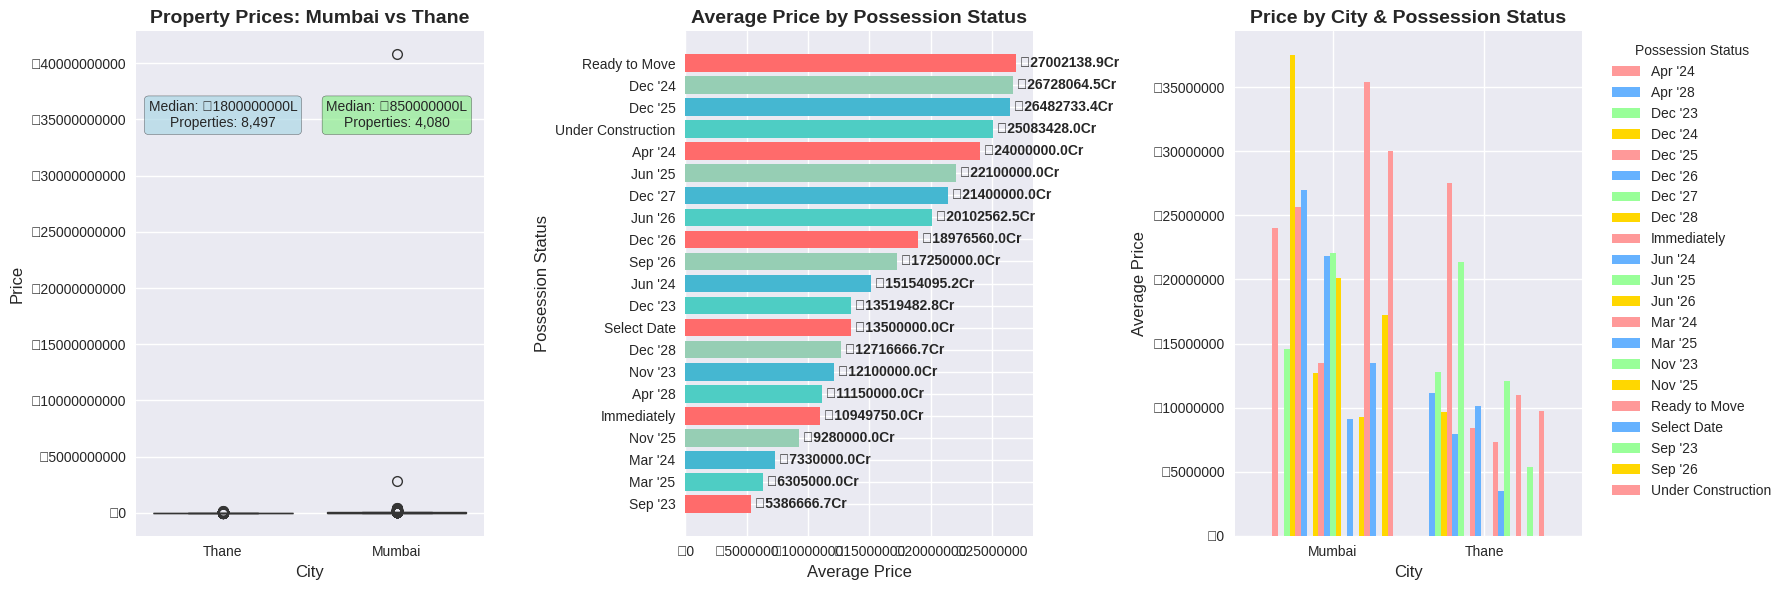


KEY INSIGHTS

 CITY COMPARISON:
   Mumbai average: ₹3392780385 lakhs
   Thane average:  ₹1084651443 lakhs
   Mumbai is 212.8% more expensive than Thane

 POSSESSION STATUS INSIGHTS:
   Sep '23: ₹5386666.7 crores (avg) | 3 properties
   Mar '25: ₹6305000.0 crores (avg) | 6 properties
   Mar '24: ₹7330000.0 crores (avg) | 5 properties
   Nov '25: ₹9280000.0 crores (avg) | 3 properties
   Immediately: ₹10949750.0 crores (avg) | 4 properties
   Apr '28: ₹11150000.0 crores (avg) | 4 properties
   Nov '23: ₹12100000.0 crores (avg) | 2 properties
   Dec '28: ₹12716666.7 crores (avg) | 12 properties
   Select Date: ₹13500000.0 crores (avg) | 2 properties
   Dec '23: ₹13519482.8 crores (avg) | 29 properties
   Jun '24: ₹15154095.2 crores (avg) | 21 properties
   Sep '26: ₹17250000.0 crores (avg) | 4 properties
   Dec '26: ₹18976560.0 crores (avg) | 50 properties
   Jun '26: ₹20102562.5 crores (avg) | 16 properties
   Dec '27: ₹21400000.0 crores (avg) | 16 properties
   Jun '25: ₹22100000.0 cro

In [14]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import DataCleaning as Dc

# Load and clean data
df = pd.read_csv("M25_DA_A1_Dataset2.csv")
print(f"Dataset shape: {df.shape}")

# Clean the data
df = Dc.detect_outliers_iqr(df, "Price")
df = Dc.check_missing_values(df, "Price")
df = Dc.check_missing_values(df, "City")
df = Dc.check_missing_values(df, "Possession Status")

# Create subset for Mumbai and Thane with positive prices only
subset = df[df['City'].isin(['Mumbai', 'Thane'])][['Price', 'City', 'Possession Status']]
subset = subset[subset['Price'] > 0]

print(f"Final dataset for analysis: {subset.shape[0]:,} properties")
print(f"Price range: {subset['Price'].min():.2f} to {subset['Price'].max():.2f} (in crores)")

# Convert prices to lakhs for better readability (multiply by 100)
subset['Price_Lakhs'] = subset['Price'] * 100

# Function to format axis labels in lakhs (no Cr/L suffix)
def format_lakhs(x, pos):
    if x >= 100:
        return f'₹{x/100:.0f}'
    else:
        return f'₹{x:.0f}'

# Create 3 focused graphs
plt.figure(figsize=(18, 6))

# Graph 1: Price Distribution by City (Box Plot)
plt.subplot(1, 3, 1)
sns.boxplot(data=subset, x='City', y='Price_Lakhs')
plt.title('Property Prices: Mumbai vs Thane', fontsize=14, fontweight='bold')
plt.xlabel('City', fontsize=12)
plt.ylabel('Price', fontsize=12)

# Format y-axis
ax1 = plt.gca()
ax1.yaxis.set_major_formatter(plt.FuncFormatter(format_lakhs))

# Add summary statistics as text
mumbai_median = subset[subset['City'] == 'Mumbai']['Price_Lakhs'].median()
thane_median = subset[subset['City'] == 'Thane']['Price_Lakhs'].median()
mumbai_count = len(subset[subset['City'] == 'Mumbai'])
thane_count = len(subset[subset['City'] == 'Thane'])

plt.text(0, max(subset['Price_Lakhs']) * 0.9, f'Median: ₹{mumbai_median:.0f}L\nProperties: {mumbai_count:,}', 
         ha='center', va='top', bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.7))
plt.text(1, max(subset['Price_Lakhs']) * 0.9, f'Median: ₹{thane_median:.0f}L\nProperties: {thane_count:,}', 
         ha='center', va='top', bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.7))

# Graph 2: Average Price by Possession Status
plt.subplot(1, 3, 2)
avg_prices_lakhs = subset.groupby('Possession Status')['Price_Lakhs'].mean().sort_values(ascending=True)
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4']
bars = plt.barh(range(len(avg_prices_lakhs)), avg_prices_lakhs.values, color=colors[:len(avg_prices_lakhs)])

plt.title('Average Price by Possession Status', fontsize=14, fontweight='bold')
plt.xlabel('Average Price', fontsize=12)
plt.ylabel('Possession Status', fontsize=12)
plt.yticks(range(len(avg_prices_lakhs)), avg_prices_lakhs.index)

# Format x-axis
ax2 = plt.gca()
ax2.xaxis.set_major_formatter(plt.FuncFormatter(format_lakhs))

# Add value labels on bars
for i, (v, status) in enumerate(zip(avg_prices_lakhs.values, avg_prices_lakhs.index)):
    if v >= 100:
        label = f'₹{v/100:.1f}Cr'
    else:
        label = f'₹{v:.0f}L'
    plt.text(v, i, f' {label}', va='center', ha='left', fontweight='bold')

# Graph 3: Price Comparison by City and Possession Status
plt.subplot(1, 3, 3)
# Create grouped bar chart
city_status_avg = subset.groupby(['City', 'Possession Status'])['Price_Lakhs'].mean().unstack()
city_status_avg.plot(kind='bar', ax=plt.gca(), width=0.8, 
                    color=['#FF9999', '#66B2FF', '#99FF99', '#FFD700'])

plt.title('Price by City & Possession Status', fontsize=14, fontweight='bold')
plt.xlabel('City', fontsize=12)
plt.ylabel('Average Price', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Possession Status', bbox_to_anchor=(1.05, 1), loc='upper left')

# Format y-axis
ax3 = plt.gca()
ax3.yaxis.set_major_formatter(plt.FuncFormatter(format_lakhs))

plt.tight_layout()
plt.show()

# Print key insights
print("\n" + "="*60)
print("KEY INSIGHTS")
print("="*60)

# City comparison
mumbai_avg = subset[subset['City'] == 'Mumbai']['Price_Lakhs'].mean()
thane_avg = subset[subset['City'] == 'Thane']['Price_Lakhs'].mean()
price_diff = ((mumbai_avg - thane_avg) / thane_avg) * 100

print(f"\n CITY COMPARISON:")
print(f"   Mumbai average: ₹{mumbai_avg:.0f} lakhs")
print(f"   Thane average:  ₹{thane_avg:.0f} lakhs")
print(f"   Mumbai is {price_diff:.1f}% more expensive than Thane")

# Possession status insights
print(f"\n POSSESSION STATUS INSIGHTS:")
for status in avg_prices_lakhs.index:
    price = avg_prices_lakhs[status]
    count = len(subset[subset['Possession Status'] == status])
    if price >= 100:
        price_str = f"₹{price/100:.1f} crores"
    else:
        price_str = f"₹{price:.0f} lakhs"
    print(f"   {status}: {price_str} (avg) | {count:,} properties")

# Market segments
budget = len(subset[subset['Price_Lakhs'] < 50])  # Under 50 lakhs
mid_range = len(subset[(subset['Price_Lakhs'] >= 50) & (subset['Price_Lakhs'] < 200)])  # 50L - 2Cr
premium = len(subset[subset['Price_Lakhs'] >= 200])  # Above 2Cr
total = len(subset)

print(f"\n MARKET SEGMENTS:")
print(f"   Budget (< ₹50L):      {budget:,} ({budget/total*100:.1f}%)")
print(f"   Mid-range (₹50L-2Cr): {mid_range:,} ({mid_range/total*100:.1f}%)")
print(f"   Premium (> ₹2Cr):     {premium:,} ({premium/total*100:.1f}%)")

print("\n" + "="*60)

Availability starts from:

Dataset shape: (12685, 145)
Outliers found in column 'Price':
          ID Possession Status Availability Starts From Floor No Commercial  \
380    12305     Ready to Move                      NaN        8          Y   
381    12304     Ready to Move                      NaN       15          N   
397    12288     Ready to Move                      NaN        8          Y   
398    12287     Ready to Move                      NaN       15          N   
561    12124     Ready to Move                      NaN       12          N   
...      ...               ...                      ...      ...        ...   
11965    720     Ready to Move                      NaN       32          N   
12053    632     Ready to Move                      NaN        4          N   
12165    520     Ready to Move                      NaN       13          N   
12413    272     Ready to Move                      NaN        3          N   
12570    115     Ready to Move                      NaN       13     

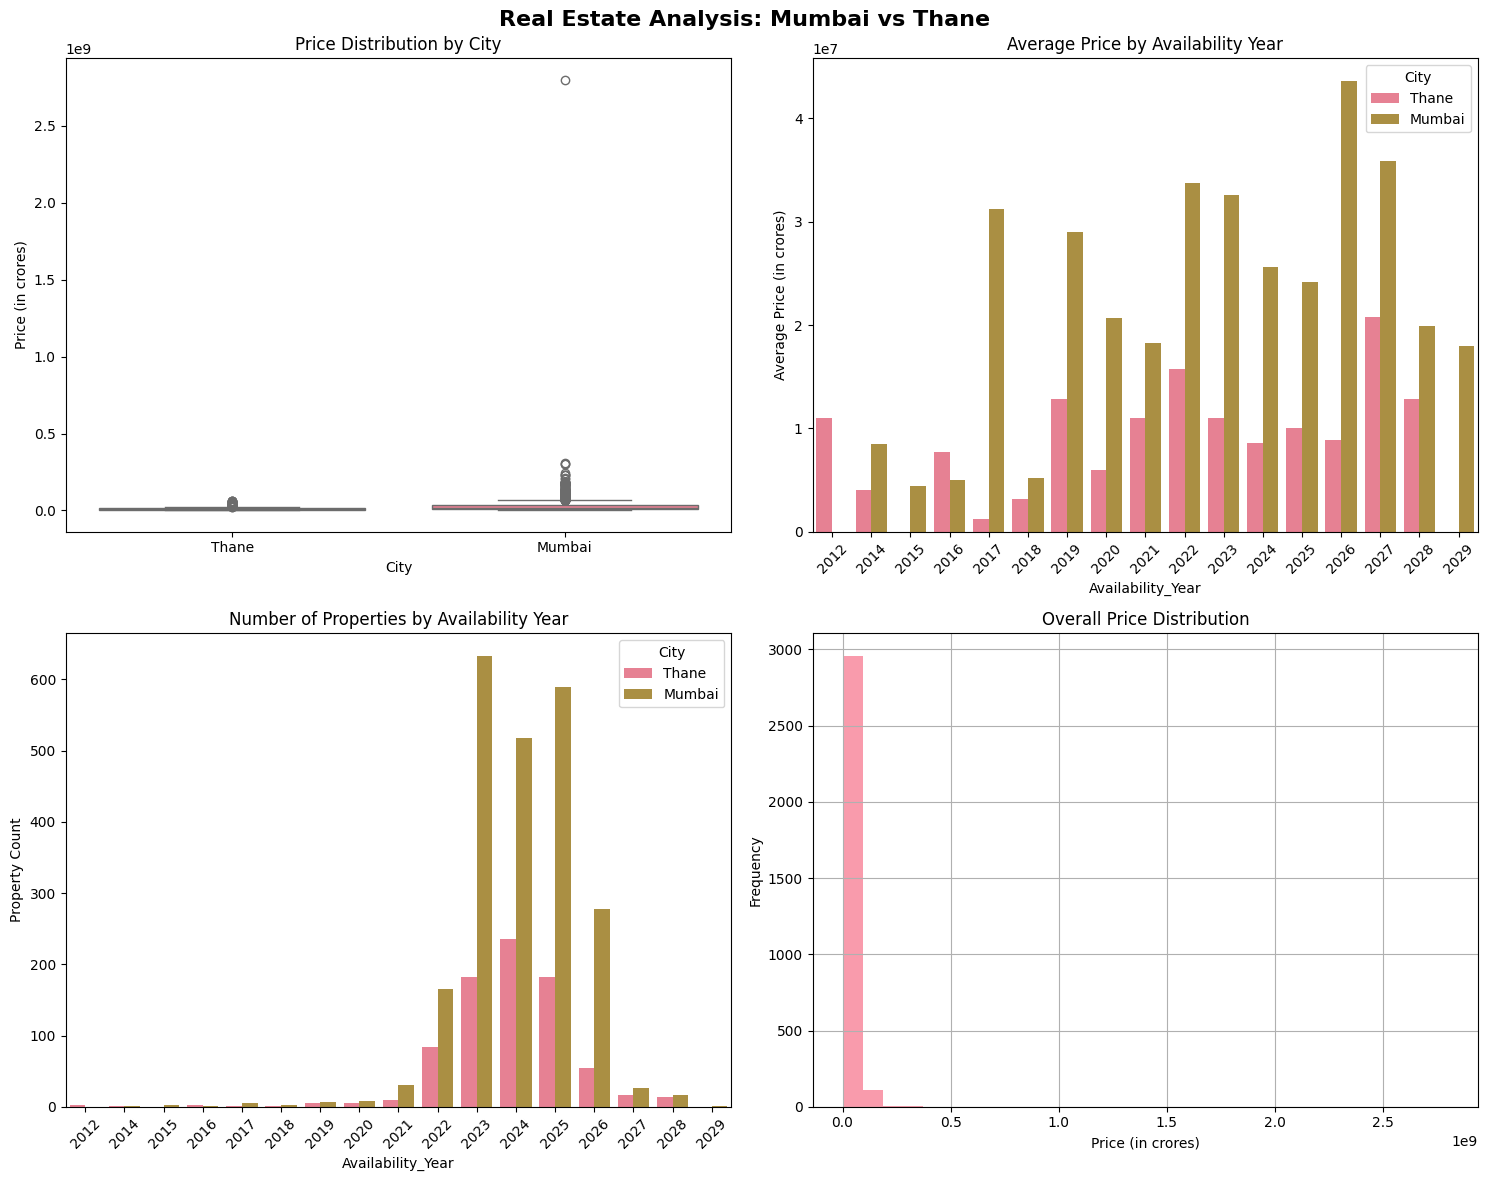


STATISTICAL SUMMARY

Overall Statistics:
Total Properties: 3,080
Average Price: ₹24882577.37 crores
Median Price: ₹14000000.00 crores
Standard Deviation: ₹58346584.26 crores

City-wise Comparison:
        Property_Count    Avg_Price  Median_Price      Std_Dev
City                                                          
Mumbai            2285  29854507.81    18000000.0  66850692.02
Thane              795  10592186.11     8369000.0   8386627.24

Year-wise Analysis:
                   Property_Count    Avg_Price  Median_Price
Availability_Year                                           
2012                            2  11000000.00    11000000.0
2014                            2   6250000.00     6250000.0
2015                            2   4475000.00     4475000.0
2016                            3   6796666.67     7695000.0
2017                            6  26237500.00     9500000.0
2018                            4   4685350.00     2913500.0
2019                           12  222666

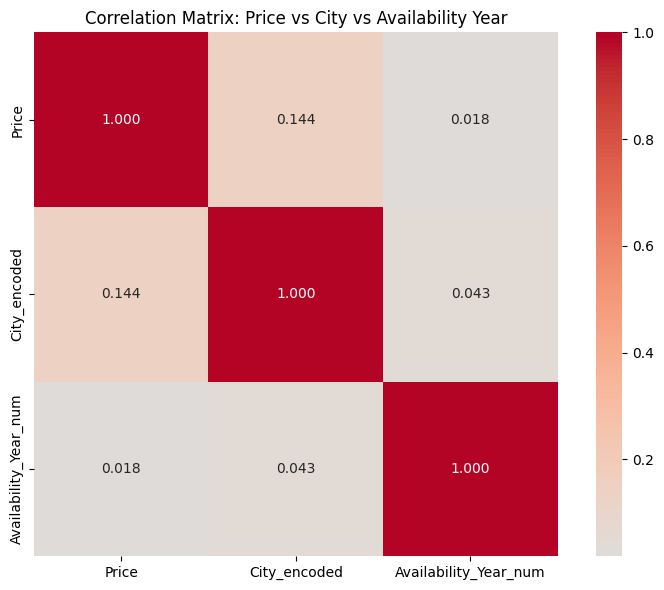


ADVANCED INSIGHTS

Mumbai vs Thane Price Analysis:
Mumbai average: ₹29854507.81 crores
Thane average: ₹10592186.11 crores
Price difference: ₹19262321.70 crores
Mumbai is 181.9% more expensive than Thane

Most expensive property: ₹2800000000.00 crores in Mumbai
Cheapest property: ₹1211250.00 crores in Thane

Most popular availability year: 2023 (815 properties)

Processed data saved to: processed_mumbai_thane_properties.csv

EXECUTIVE SUMMARY
• Analyzed 3,080 properties in Mumbai and Thane
• Price range: ₹1211250.00 - ₹2800000000.00 crores
• Average price difference: Mumbai is ₹19262321.70 crores more expensive
• Most properties available in: 2023
• Data spans availability years: 2012 to 2029


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import DataCleaning as Dc
import re
from datetime import datetime

# Your existing code
df = pd.read_csv("M25_DA_A1_Dataset2.csv")
print(f"Dataset shape: {df.shape}")

# Clean the data
df = Dc.detect_outliers_iqr(df, "Price")
df = Dc.check_missing_values(df, "Price")
df = Dc.check_missing_values(df, "City")
df = Dc.check_missing_values(df, "Availability Starts From")

# Create subset for Mumbai and Thane with positive prices only
subset = df[df['City'].isin(['Mumbai', 'Thane'])][['Price', 'City', 'Availability Starts From']]
subset = subset[subset['Price'] > 0]

print(f"Final dataset for analysis: {subset.shape[0]:,} properties")
print(f"Price range: {subset['Price'].min():.2f} to {subset['Price'].max():.2f} (in crores)")

# CONTINUE FROM HERE:

# 1. CLEAN AND TRANSFORM AVAILABILITY DATES
def transform_availability_date(date_str):
    """Transform date formats to year only"""
    if pd.isna(date_str) or str(date_str).upper() == 'NA':
        return None
    
    date_str = str(date_str).strip()
    
    # Pattern for "Dec 25", "Jan 24", etc.
    pattern = r"[A-Za-z]{3}\s*'?(\d{2})"
    match = re.search(pattern, date_str)
    if match:
        year_2digit = int(match.group(1))
        # Assume 00-30 are 2000s, 31-99 are 1900s
        if year_2digit <= 30:
            return f"20{year_2digit:02d}"
        else:
            return f"19{year_2digit:02d}"
    
    return date_str

# Apply date transformation
subset['Availability_Year'] = subset['Availability Starts From'].apply(transform_availability_date)
subset = subset.dropna(subset=['Availability_Year'])

print(f"\nAfter cleaning availability dates: {subset.shape[0]:,} properties")
print(f"Available years: {sorted(subset['Availability_Year'].unique())}")

# 2. EXPLORATORY DATA ANALYSIS

# Set up the plotting style
plt.style.use('default')
sns.set_palette("husl")
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Real Estate Analysis: Mumbai vs Thane', fontsize=16, fontweight='bold')

# Plot 1: Price Distribution by City
sns.boxplot(data=subset, x='City', y='Price', ax=axes[0,0])
axes[0,0].set_title('Price Distribution by City')
axes[0,0].set_ylabel('Price (in crores)')

# Plot 2: Average Price by Availability Year
yearly_prices = subset.groupby(['Availability_Year', 'City'])['Price'].mean().reset_index()
sns.barplot(data=yearly_prices, x='Availability_Year', y='Price', hue='City', ax=axes[0,1])
axes[0,1].set_title('Average Price by Availability Year')
axes[0,1].set_ylabel('Average Price (in crores)')
axes[0,1].tick_params(axis='x', rotation=45)

# Plot 3: Property Count by Year and City
year_counts = subset.groupby(['Availability_Year', 'City']).size().reset_index(name='Count')
sns.barplot(data=year_counts, x='Availability_Year', y='Count', hue='City', ax=axes[1,0])
axes[1,0].set_title('Number of Properties by Availability Year')
axes[1,0].set_ylabel('Property Count')
axes[1,0].tick_params(axis='x', rotation=45)

# Plot 4: Price Distribution Histogram
subset['Price'].hist(bins=30, alpha=0.7, ax=axes[1,1])
axes[1,1].set_title('Overall Price Distribution')
axes[1,1].set_xlabel('Price (in crores)')
axes[1,1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# 3. STATISTICAL SUMMARY
print("\n" + "="*50)
print("STATISTICAL SUMMARY")
print("="*50)

# Overall statistics
print("\nOverall Statistics:")
print(f"Total Properties: {subset.shape[0]:,}")
print(f"Average Price: ₹{subset['Price'].mean():.2f} crores")
print(f"Median Price: ₹{subset['Price'].median():.2f} crores")
print(f"Standard Deviation: ₹{subset['Price'].std():.2f} crores")

# City-wise comparison
print("\nCity-wise Comparison:")
city_stats = subset.groupby('City')['Price'].agg(['count', 'mean', 'median', 'std']).round(2)
city_stats.columns = ['Property_Count', 'Avg_Price', 'Median_Price', 'Std_Dev']
print(city_stats)

# Year-wise analysis
print("\nYear-wise Analysis:")
year_stats = subset.groupby('Availability_Year')['Price'].agg(['count', 'mean', 'median']).round(2)
year_stats.columns = ['Property_Count', 'Avg_Price', 'Median_Price']
print(year_stats)

# 4. CORRELATION ANALYSIS
print("\n" + "="*50)
print("CORRELATION ANALYSIS")
print("="*50)

# Convert categorical variables to numerical for correlation
subset_encoded = subset.copy()
subset_encoded['City_encoded'] = subset_encoded['City'].map({'Mumbai': 1, 'Thane': 0})
subset_encoded['Availability_Year_num'] = pd.to_numeric(subset_encoded['Availability_Year'])

# Calculate correlations
correlations = subset_encoded[['Price', 'City_encoded', 'Availability_Year_num']].corr()
print("\nCorrelation Matrix:")
print(correlations.round(3))

# Visualize correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlations, annot=True, cmap='coolwarm', center=0, 
            square=True, fmt='.3f')
plt.title('Correlation Matrix: Price vs City vs Availability Year')
plt.tight_layout()
plt.show()

# 5. ADVANCED ANALYSIS
print("\n" + "="*50)
print("ADVANCED INSIGHTS")
print("="*50)

# Price comparison between cities
mumbai_prices = subset[subset['City'] == 'Mumbai']['Price']
thane_prices = subset[subset['City'] == 'Thane']['Price']

print(f"\nMumbai vs Thane Price Analysis:")
print(f"Mumbai average: ₹{mumbai_prices.mean():.2f} crores")
print(f"Thane average: ₹{thane_prices.mean():.2f} crores")
print(f"Price difference: ₹{mumbai_prices.mean() - thane_prices.mean():.2f} crores")
print(f"Mumbai is {(mumbai_prices.mean() / thane_prices.mean() - 1) * 100:.1f}% more expensive than Thane")

# Most expensive and cheapest properties
print(f"\nMost expensive property: ₹{subset['Price'].max():.2f} crores in {subset.loc[subset['Price'].idxmax(), 'City']}")
print(f"Cheapest property: ₹{subset['Price'].min():.2f} crores in {subset.loc[subset['Price'].idxmin(), 'City']}")

# Year with most properties
most_popular_year = subset['Availability_Year'].value_counts().index[0]
print(f"\nMost popular availability year: {most_popular_year} ({subset['Availability_Year'].value_counts().iloc[0]} properties)")

# 6. SAVE PROCESSED DATA
processed_filename = "processed_mumbai_thane_properties.csv"
subset.to_csv(processed_filename, index=False)
print(f"\nProcessed data saved to: {processed_filename}")

# 7. SUMMARY REPORT
print("\n" + "="*60)
print("EXECUTIVE SUMMARY")
print("="*60)
print(f"• Analyzed {subset.shape[0]:,} properties in Mumbai and Thane")
print(f"• Price range: ₹{subset['Price'].min():.2f} - ₹{subset['Price'].max():.2f} crores")
print(f"• Average price difference: Mumbai is ₹{mumbai_prices.mean() - thane_prices.mean():.2f} crores more expensive")
print(f"• Most properties available in: {most_popular_year}")
print(f"• Data spans availability years: {min(subset['Availability_Year'])} to {max(subset['Availability_Year'])}")

### QUESTION 7

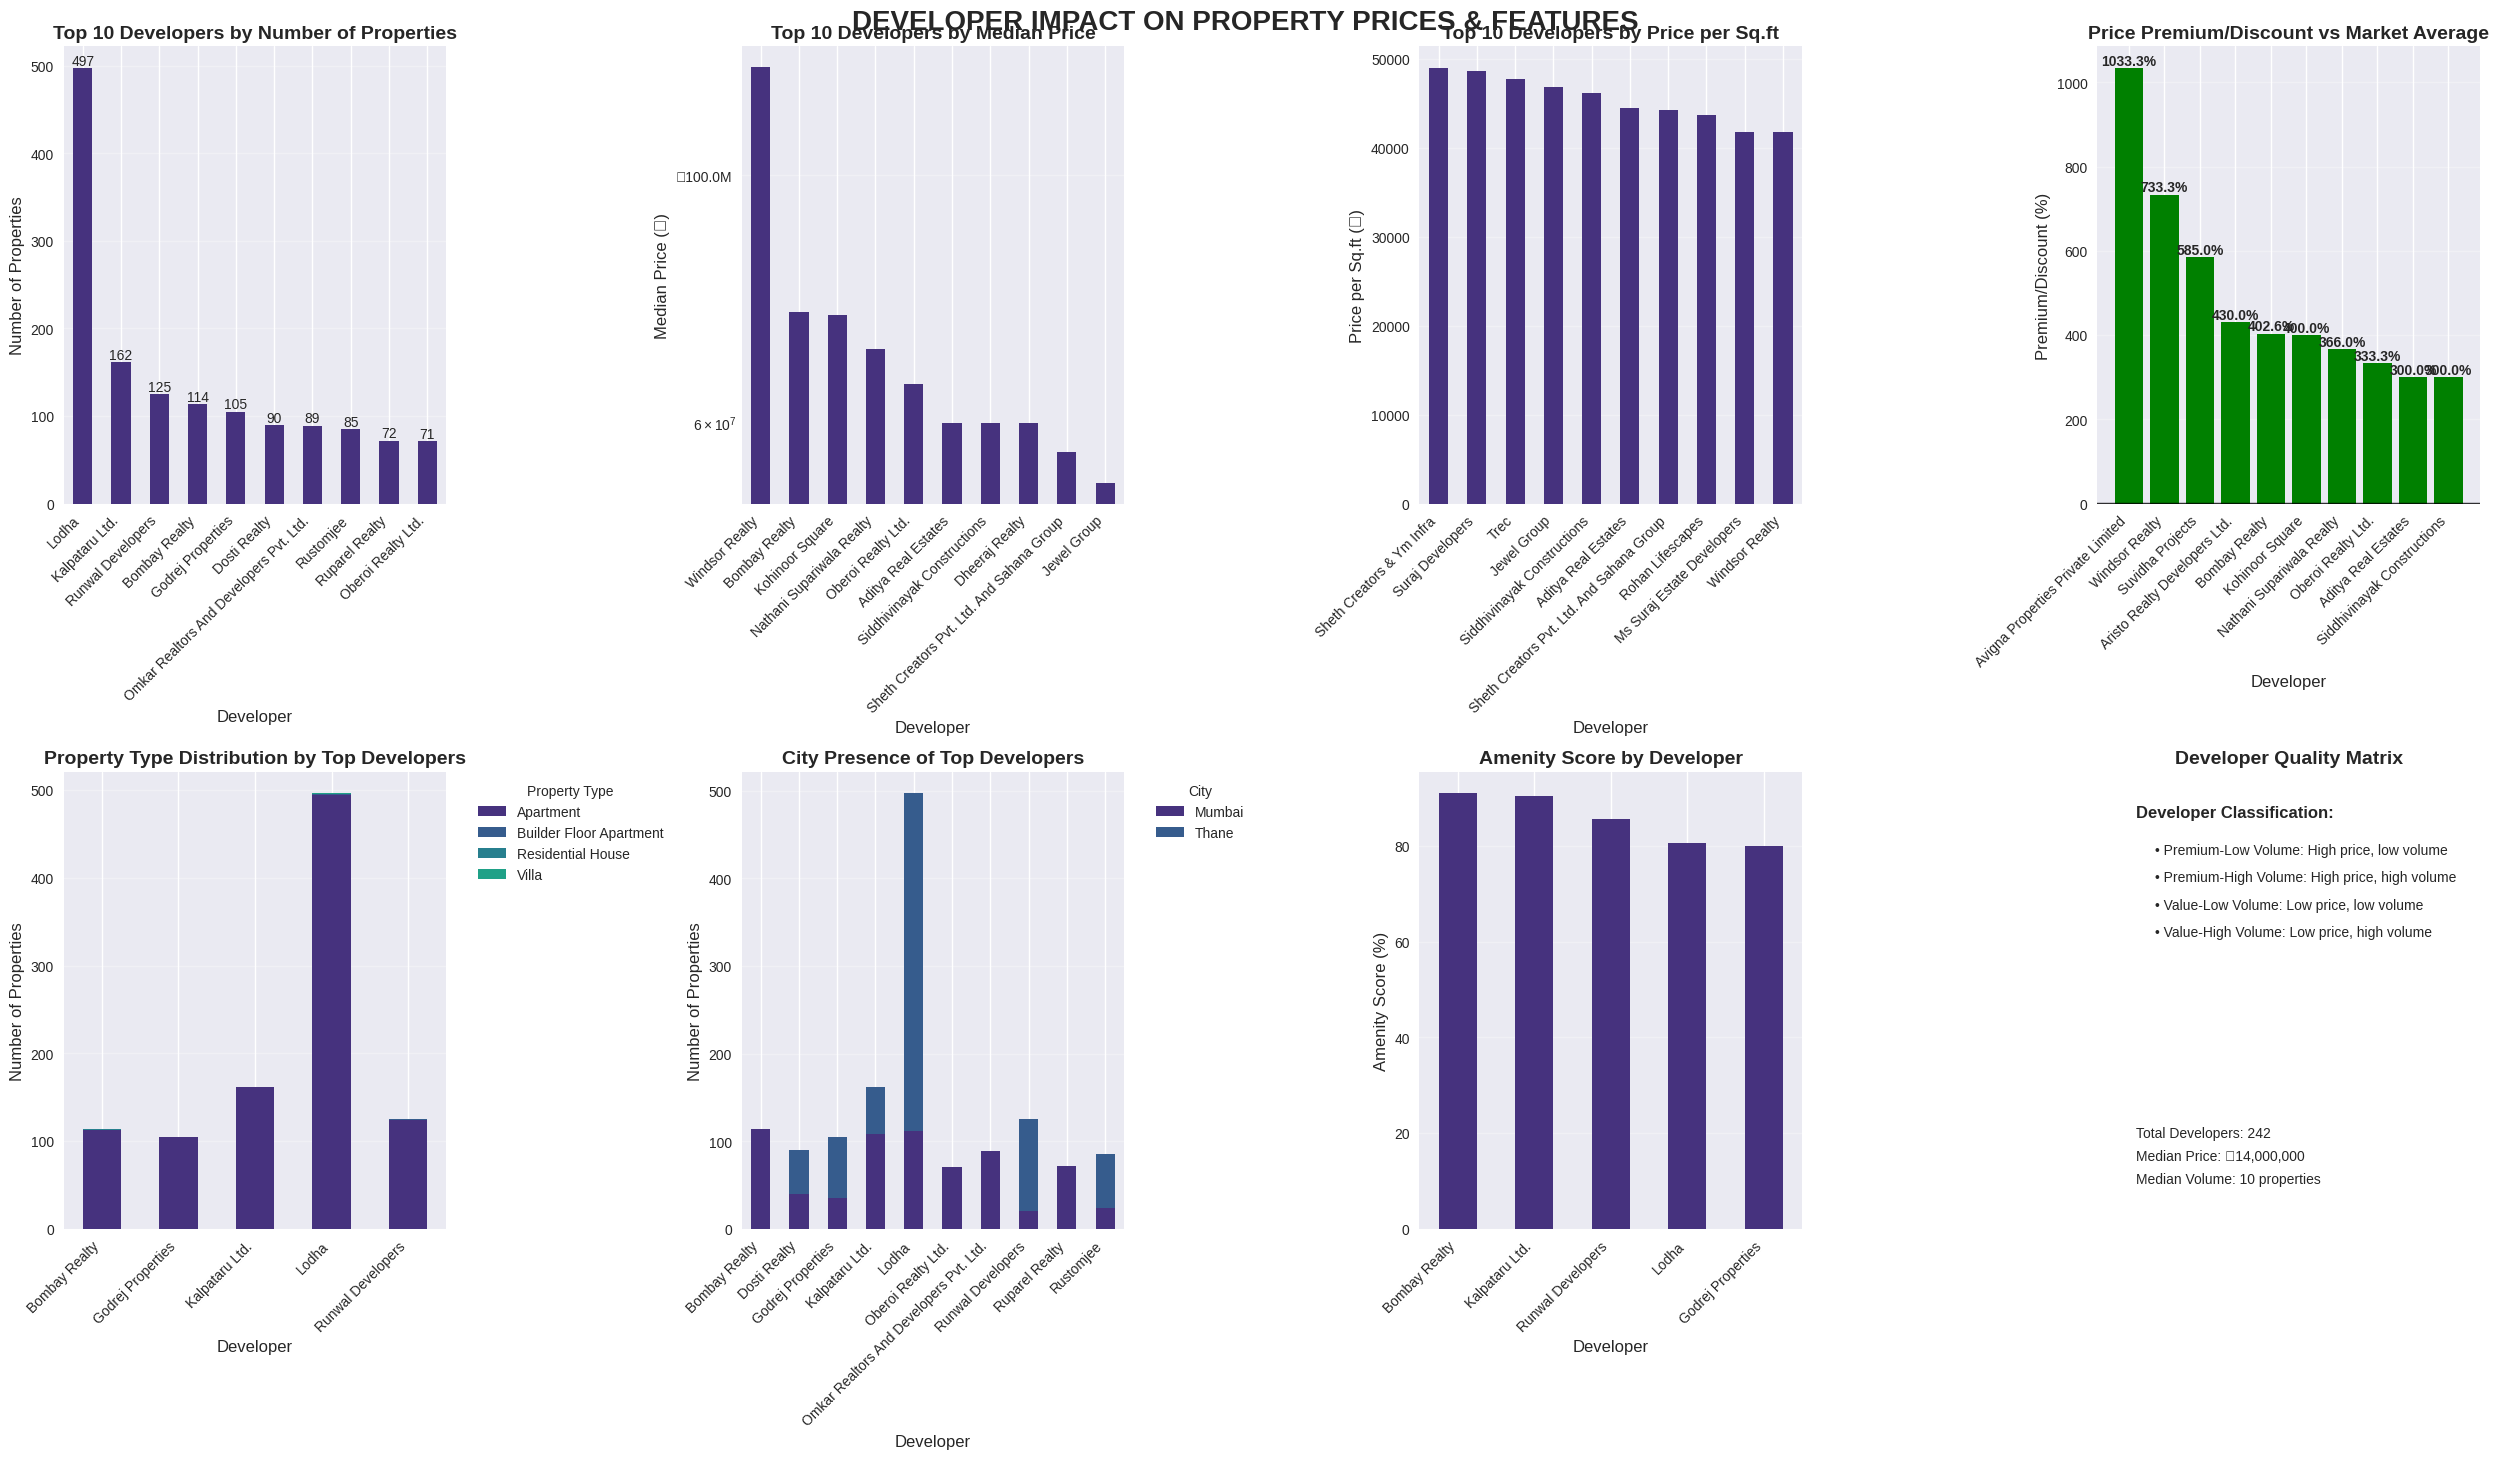

DEVELOPER IMPACT ON PROPERTY PRICES & FEATURES ANALYSIS
Overall Statistics:
   • Total properties analyzed: 4,537
   • Unique developers: 255
   • Properties with developer info: 4,537

TOP DEVELOPERS ANALYSIS:
   1. Lodha: 497.0 properties, ₹9,500,000 (₹17,556/sq.ft)
   2. Kalpataru Ltd.: 162.0 properties, ₹20,000,000 (₹29,234/sq.ft)
   3. Runwal Developers: 125.0 properties, ₹9,500,000 (₹17,291/sq.ft)
   4. Bombay Realty: 114.0 properties, ₹75,388,500 (₹37,782/sq.ft)
   5. Godrej Properties: 105.0 properties, ₹14,400,000 (₹18,943/sq.ft)
   6. Dosti Realty: 90.0 properties, ₹15,750,000 (₹20,270/sq.ft)
   7. Omkar Realtors And Developers Pvt. Ltd.: 89.0 properties, ₹35,005,000 (₹26,230/sq.ft)
   8. Rustomjee: 85.0 properties, ₹12,900,000 (₹18,473/sq.ft)
   9. Ruparel Realty: 72.0 properties, ₹23,250,000 (₹34,198/sq.ft)
   10. Oberoi Realty Ltd.: 71.0 properties, ₹65,000,000 (₹40,000/sq.ft)

PREMIUM DEVELOPERS (Highest Median Price):
   1. Avigna Properties Private Limited: ₹170,000,000

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter
import warnings
warnings.filterwarnings('ignore')

# Set the style for better looking plots
plt.style.use('seaborn-v0_8')
sns.set_palette("viridis")

# Load the dataset
df = pd.read_csv('M25_DA_A1_Dataset2.csv')

# Data cleaning and preparation
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')
df = df.dropna(subset=['Price'])

# Clean and standardize Developer/Builder names
if 'Developer' in df.columns:
    df['Developer_Clean'] = df['Developer'].str.strip().str.title()
    # Replace empty strings and common placeholders with NaN
    df['Developer_Clean'] = df['Developer_Clean'].replace(['', 'Na', 'N/A', 'Not Available', 'Unknown'], np.nan)
elif 'Builder' in df.columns:
    df['Developer_Clean'] = df['Builder'].str.strip().str.title()
    df['Developer_Clean'] = df['Developer_Clean'].replace(['', 'Na', 'N/A', 'Not Available', 'Unknown'], np.nan)
else:
    df['Developer_Clean'] = np.nan

# Filter for developers with sufficient data (at least 5 properties)
if 'Developer_Clean' in df.columns:
    developer_counts = df['Developer_Clean'].value_counts()
    top_developers = developer_counts[developer_counts >= 5].index.tolist()
    df_developers = df[df['Developer_Clean'].isin(top_developers)].copy()
else:
    df_developers = df.copy()

# Calculate price per sqft if carpet area is available
if 'Carpet Area' in df_developers.columns:
    df_developers['Carpet Area'] = pd.to_numeric(df_developers['Carpet Area'], errors='coerce')
    df_developers['Price_per_sqft'] = df_developers['Price'] / df_developers['Carpet Area']
    # Remove extreme outliers
    df_developers = df_developers[(df_developers['Price_per_sqft'] > 1000) & (df_developers['Price_per_sqft'] < 50000)]

# Create visualizations
fig = plt.figure(figsize=(25, 20))
plt.suptitle('DEVELOPER IMPACT ON PROPERTY PRICES & FEATURES', 
             fontsize=20, fontweight='bold', y=0.98)

# 1. Top Developers by Number of Properties
plt.subplot(3, 4, 1)
if 'Developer_Clean' in df_developers.columns and not df_developers['Developer_Clean'].isna().all():
    top_10_devs = df_developers['Developer_Clean'].value_counts().head(10)
    top_10_devs.plot(kind='bar', ax=plt.gca())
    plt.title('Top 10 Developers by Number of Properties', fontsize=14, fontweight='bold')
    plt.ylabel('Number of Properties', fontsize=12)
    plt.xlabel('Developer', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.grid(True, alpha=0.3, axis='y')
    
    # Add value labels on bars
    for i, v in enumerate(top_10_devs.values):
        plt.text(i, v + 0.1, str(v), ha='center', va='bottom', fontsize=10)
else:
    plt.text(0.5, 0.5, 'Developer data not available', ha='center', va='center', fontsize=12)
    plt.title('Developer Analysis Not Available', fontsize=14, fontweight='bold')

# 2. Average Price by Developer
plt.subplot(3, 4, 2)
if 'Developer_Clean' in df_developers.columns and not df_developers['Developer_Clean'].isna().all():
    dev_price = df_developers.groupby('Developer_Clean')['Price'].agg(['count', 'mean', 'median']).round(0)
    dev_price = dev_price[dev_price['count'] >= 3]  # Only developers with at least 3 properties
    dev_price = dev_price.sort_values('median', ascending=False).head(10)
    
    dev_price['median'].plot(kind='bar', ax=plt.gca())
    plt.title('Top 10 Developers by Median Price', fontsize=14, fontweight='bold')
    plt.ylabel('Median Price (₹)', fontsize=12)
    plt.xlabel('Developer', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.yscale('log')
    plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, p: f'₹{x/1000000:.1f}M'))
    plt.grid(True, alpha=0.3, axis='y')
else:
    plt.text(0.5, 0.5, 'Developer data not available', ha='center', va='center', fontsize=12)
    plt.title('Price Analysis Not Available', fontsize=14, fontweight='bold')

# 3. Price per Sq.ft by Developer
plt.subplot(3, 4, 3)
if 'Developer_Clean' in df_developers.columns and 'Price_per_sqft' in df_developers.columns:
    dev_pps = df_developers.groupby('Developer_Clean')['Price_per_sqft'].agg(['count', 'mean', 'median']).round(0)
    dev_pps = dev_pps[dev_pps['count'] >= 3]  # Only developers with at least 3 properties
    dev_pps = dev_pps.sort_values('median', ascending=False).head(10)
    
    dev_pps['median'].plot(kind='bar', ax=plt.gca())
    plt.title('Top 10 Developers by Price per Sq.ft', fontsize=14, fontweight='bold')
    plt.ylabel('Price per Sq.ft (₹)', fontsize=12)
    plt.xlabel('Developer', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.grid(True, alpha=0.3, axis='y')
else:
    plt.text(0.5, 0.5, 'Required data not available', ha='center', va='center', fontsize=12)
    plt.title('Price per Sq.ft Analysis Not Available', fontsize=14, fontweight='bold')

# 4. Developer Price Premium Analysis
plt.subplot(3, 4, 4)
if 'Developer_Clean' in df_developers.columns and len(df_developers['Developer_Clean'].unique()) > 1:
    overall_median_price = df_developers['Price'].median()
    dev_premium = df_developers.groupby('Developer_Clean')['Price'].median() - overall_median_price
    dev_premium_pct = (dev_premium / overall_median_price * 100).round(1)
    
    # Get top 10 developers by absolute premium
    top_premium = dev_premium_pct.abs().sort_values(ascending=False).head(10).index
    dev_premium_pct = dev_premium_pct[top_premium].sort_values(ascending=False)
    
    colors = ['green' if x > 0 else 'red' for x in dev_premium_pct.values]
    plt.bar(dev_premium_pct.index, dev_premium_pct.values, color=colors)
    plt.title('Price Premium/Discount vs Market Average', fontsize=14, fontweight='bold')
    plt.ylabel('Premium/Discount (%)', fontsize=12)
    plt.xlabel('Developer', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.grid(True, alpha=0.3, axis='y')
    plt.axhline(y=0, color='black', linestyle='-', alpha=0.8)
    
    for i, v in enumerate(dev_premium_pct.values):
        plt.text(i, v + 1 if v > 0 else v - 3, f'{v:.1f}%', ha='center', va='bottom' if v > 0 else 'top', fontweight='bold')
else:
    plt.text(0.5, 0.5, 'Insufficient developer data', ha='center', va='center', fontsize=12)
    plt.title('Premium Analysis Not Available', fontsize=14, fontweight='bold')

# 5. Developer Property Type Distribution
plt.subplot(3, 4, 5)
if 'Developer_Clean' in df_developers.columns and 'Type of Property' in df_developers.columns:
    # Get top 5 developers
    top_devs = df_developers['Developer_Clean'].value_counts().head(5).index
    
    prop_type_data = []
    for developer in top_devs:
        dev_data = df_developers[df_developers['Developer_Clean'] == developer]
        prop_counts = dev_data['Type of Property'].value_counts().head(3)  # Top 3 property types
        for prop_type, count in prop_counts.items():
            prop_type_data.append({'Developer': developer, 'Property_Type': prop_type, 'Count': count})
    
    if prop_type_data:
        prop_df = pd.DataFrame(prop_type_data)
        pivot_df = prop_df.pivot(index='Developer', columns='Property_Type', values='Count').fillna(0)
        pivot_df.plot(kind='bar', stacked=True, ax=plt.gca())
        plt.title('Property Type Distribution by Top Developers', fontsize=14, fontweight='bold')
        plt.ylabel('Number of Properties', fontsize=12)
        plt.xlabel('Developer', fontsize=12)
        plt.xticks(rotation=45, ha='right')
        plt.legend(title='Property Type', bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.grid(True, alpha=0.3, axis='y')
    else:
        plt.text(0.5, 0.5, 'No property type data', ha='center', va='center', fontsize=12)
        plt.title('Property Type Analysis Not Available', fontsize=14, fontweight='bold')
else:
    plt.text(0.5, 0.5, 'Required data not available', ha='center', va='center', fontsize=12)
    plt.title('Property Type Analysis Not Available', fontsize=14, fontweight='bold')

# 6. Developer City Presence
plt.subplot(3, 4, 6)
if 'Developer_Clean' in df_developers.columns and 'City' in df_developers.columns:
    # Get top 10 developers
    top_devs = df_developers['Developer_Clean'].value_counts().head(10).index
    
    city_data = []
    for developer in top_devs:
        dev_data = df_developers[df_developers['Developer_Clean'] == developer]
        city_counts = dev_data['City'].value_counts().head(3)  # Top 3 cities
        for city, count in city_counts.items():
            city_data.append({'Developer': developer, 'City': city, 'Count': count})
    
    if city_data:
        city_df = pd.DataFrame(city_data)
        pivot_df = city_df.pivot(index='Developer', columns='City', values='Count').fillna(0)
        pivot_df.plot(kind='bar', stacked=True, ax=plt.gca())
        plt.title('City Presence of Top Developers', fontsize=14, fontweight='bold')
        plt.ylabel('Number of Properties', fontsize=12)
        plt.xlabel('Developer', fontsize=12)
        plt.xticks(rotation=45, ha='right')
        plt.legend(title='City', bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.grid(True, alpha=0.3, axis='y')
    else:
        plt.text(0.5, 0.5, 'No city data', ha='center', va='center', fontsize=12)
        plt.title('City Analysis Not Available', fontsize=14, fontweight='bold')
else:
    plt.text(0.5, 0.5, 'Required data not available', ha='center', va='center', fontsize=12)
    plt.title('City Analysis Not Available', fontsize=14, fontweight='bold')

# 7. Amenities Analysis by Developer
plt.subplot(3, 4, 7)
# Check for common amenity columns
amenity_columns = [col for col in df_developers.columns if any(keyword in col.lower() for keyword in 
                   ['amenit', 'facilit', 'park', 'pool', 'gym', 'garden', 'security', 'lift'])]

if amenity_columns and 'Developer_Clean' in df_developers.columns:
    # Get top 5 developers
    top_devs = df_developers['Developer_Clean'].value_counts().head(5).index
    
    amenity_scores = {}
    for developer in top_devs:
        dev_data = df_developers[df_developers['Developer_Clean'] == developer]
        score = 0
        count = 0
        for amenity_col in amenity_columns[:3]:  # Use top 3 amenity columns
            if amenity_col in dev_data.columns:
                # Simple scoring: count non-null values
                score += dev_data[amenity_col].notna().sum()
                count += len(dev_data)
        if count > 0:
            amenity_scores[developer] = (score / count) * 100  # Percentage score
    
    if amenity_scores:
        amenity_series = pd.Series(amenity_scores).sort_values(ascending=False)
        amenity_series.plot(kind='bar', ax=plt.gca())
        plt.title('Amenity Score by Developer', fontsize=14, fontweight='bold')
        plt.ylabel('Amenity Score (%)', fontsize=12)
        plt.xlabel('Developer', fontsize=12)
        plt.xticks(rotation=45, ha='right')
        plt.grid(True, alpha=0.3, axis='y')
    else:
        plt.text(0.5, 0.5, 'No amenity data available', ha='center', va='center', fontsize=12)
        plt.title('Amenity Analysis Not Available', fontsize=14, fontweight='bold')
else:
    plt.text(0.5, 0.5, 'Amenity data not available', ha='center', va='center', fontsize=12)
    plt.title('Amenity Analysis Not Available', fontsize=14, fontweight='bold')

# 8. Developer Quality Matrix
plt.subplot(3, 4, 8)
if 'Developer_Clean' in df_developers.columns and 'Price' in df_developers.columns:
    # Calculate metrics for top developers
    dev_stats = df_developers.groupby('Developer_Clean').agg({
        'Price': ['count', 'median'],
        'Price_per_sqft': 'median' if 'Price_per_sqft' in df_developers.columns else 'count'
    }).round(0)
    
    dev_stats = dev_stats[dev_stats[('Price', 'count')] >= 3]  # Minimum 3 properties
    
    if len(dev_stats) > 0:
        # Classify developers
        price_median = dev_stats[('Price', 'median')].median()
        volume_median = dev_stats[('Price', 'count')].median()
        
        categories = {
            'Premium-Low Volume': 'High price, low volume',
            'Premium-High Volume': 'High price, high volume',
            'Value-Low Volume': 'Low price, low volume',
            'Value-High Volume': 'Low price, high volume'
        }
        
        y_pos = 0.9
        plt.text(0.1, y_pos, 'Developer Classification:', fontsize=12, fontweight='bold', transform=plt.gca().transAxes)
        y_pos -= 0.08
        
        for category, description in categories.items():
            plt.text(0.15, y_pos, f'• {category}: {description}', fontsize=10, transform=plt.gca().transAxes)
            y_pos -= 0.06
        
        # Add some statistics
        plt.text(0.1, 0.2, f'Total Developers: {len(dev_stats)}', fontsize=10, transform=plt.gca().transAxes)
        plt.text(0.1, 0.15, f'Median Price: ₹{price_median:,.0f}', fontsize=10, transform=plt.gca().transAxes)
        plt.text(0.1, 0.1, f'Median Volume: {volume_median:.0f} properties', fontsize=10, transform=plt.gca().transAxes)
        
        plt.axis('off')
        plt.title('Developer Quality Matrix', fontsize=14, fontweight='bold')
    else:
        plt.text(0.5, 0.5, 'Insufficient developer data', ha='center', va='center', fontsize=12)
        plt.title('Quality Matrix Not Available', fontsize=14, fontweight='bold')
else:
    plt.text(0.5, 0.5, 'Developer data not available', ha='center', va='center', fontsize=12)
    plt.title('Quality Matrix Not Available', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('developer_impact_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# Generate detailed analysis report
print("=" * 80)
print("DEVELOPER IMPACT ON PROPERTY PRICES & FEATURES ANALYSIS")
print("=" * 80)

# Overall statistics
print(f"Overall Statistics:")
print(f"   • Total properties analyzed: {len(df_developers):,}")
if 'Developer_Clean' in df_developers.columns:
    print(f"   • Unique developers: {df_developers['Developer_Clean'].nunique()}")
    print(f"   • Properties with developer info: {df_developers['Developer_Clean'].notna().sum():,}")

# Top developers analysis
print(f"\nTOP DEVELOPERS ANALYSIS:")
if 'Developer_Clean' in df_developers.columns:
    top_developers_stats = df_developers.groupby('Developer_Clean').agg({
        'Price': ['count', 'median', 'mean'],
        'Price_per_sqft': 'median' if 'Price_per_sqft' in df_developers.columns else 'count'
    }).round(0).sort_values(('Price', 'count'), ascending=False).head(10)
    
    for i, (developer, stats) in enumerate(top_developers_stats.iterrows(), 1):
        count = stats[('Price', 'count')]
        median_price = stats[('Price', 'median')]
        if 'Price_per_sqft' in df_developers.columns:
            median_pps = stats[('Price_per_sqft', 'median')]
            print(f"   {i}. {developer}: {count} properties, ₹{median_price:,.0f} (₹{median_pps:,.0f}/sq.ft)")
        else:
            print(f"   {i}. {developer}: {count} properties, ₹{median_price:,.0f}")

# Premium developers analysis
print(f"\nPREMIUM DEVELOPERS (Highest Median Price):")
if 'Developer_Clean' in df_developers.columns:
    premium_devs = df_developers.groupby('Developer_Clean')['Price'].median().sort_values(ascending=False).head(5)
    for i, (developer, price) in enumerate(premium_devs.items(), 1):
        print(f"   {i}. {developer}: ₹{price:,.0f}")

# High-volume developers analysis
print(f"\nHIGH-VOLUME DEVELOPERS:")
if 'Developer_Clean' in df_developers.columns:
    volume_devs = df_developers['Developer_Clean'].value_counts().head(5)
    for i, (developer, count) in enumerate(volume_devs.items(), 1):
        print(f"   {i}. {developer}: {count} properties")

# Developer recommendations
print(f"\nINVESTMENT RECOMMENDATIONS:")

print(f"\nPREMIUM DEVELOPERS:")
print(f"   • Target for luxury properties and high-end investments")
print(f"   • Higher price points but potentially better amenities")
print(f"   • Better brand recognition and resale value")

print(f"\nHIGH-VOLUME DEVELOPERS:")
print(f"   • Established track record with multiple projects")
print(f"   • Potentially better after-sales service")
print(f"   • More reliable delivery timelines")

print(f"\nEMERGING DEVELOPERS:")
print(f"   • Look for developers with few but high-quality projects")
print(f"   • Potential for growth and brand development")
print(f"   • May offer better value for money")

# Risk assessment
print(f"\nRISK ASSESSMENT:")
print(f"   • New/unknown developers: Higher risk, but potential for higher returns")
print(f"   • Established developers: Lower risk, but premium pricing")
print(f"   • Single-project developers: Higher dependency on one project's success")
print(f"   • Multi-city developers: Diversified risk across markets")

# print(f"\n✅ Analysis complete! Visualizations saved as 'developer_impact_analysis.png'")

# # Save detailed analysis to CSV
# if 'Developer_Clean' in df_developers.columns:
#     analysis_export = df_developers[[
#         'Developer_Clean', 'Price', 'Price_per_sqft' if 'Price_per_sqft' in df_developers.columns else 'Price',
#         'Type of Property', 'City', 'Carpet Area' if 'Carpet Area' in df_developers.columns else 'Price'
#     ]].copy()
    
#     analysis_export.to_csv('developer_impact_analysis.csv', index=False)
#     print(f"💾 Detailed analysis saved to 'developer_impact_analysis.csv'")